# Preparación del entorno de trabajo

Vamos a realizar varias acciones para preparar el entorno de trabajo:
* Instalar las librerías que vamos a utilizar durante el procesamiento de los datos
* Configurar ciertas opciones de visualización de los datos durante el procesamiento.
* Carga de los datos

## Instalación de librerías

Instalamos las librerías que vamos a utilizar en este análisis. En caso de no tenerlas instaladas en nuestro ordenador podemos hacerlo con pip install.

* Pandas: es una biblioteca especializada en la manipulación y análisis de datos.
* Numpy: permite realizar operaciones matemáticas en grandes estructuras de datos.
* Os: contiene utilidades relacionadas con el ssistema operativo, permitiendo interactuar con el sistema de archivos.
* Matplotlib: es una biblioteca de gráficos 2D para representación de datos. La función mticker permite personalizar la apariencia de las marcas en los ejes de gráficos.
* Seaborn: está basado en matplotlib, se utiliza para realizar visualizaciones más complejas.
* scipy: es una biblioteca con una gran diversidad de funciones matemáticas y científicas. El módulo chi2_contingency nos permitirá realizar la prueba chi cuadrado para evaluar si hay una relación significativa entre dos variables categóricas en una tabla de contingencia.
* KaggleApi: permite la descarga de datos desde la plataforma Kaggle
* Nominatim: la utilizamos para geocodificar el campo location y poder ubicar a los usuarios en un mapa.
* Folium: permite la creación de mapas interactivos
* Time: para trabajar con medidas de tiempo    

In [186]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.ticker as mticker
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
from geopy.geocoders import Nominatim
import folium
import time

## Configuración de visualización de datos

Utilizamos las opciones de configuración de Pandas para ajustar la forma en la que se presentan los datos de los dataframes. De esta manera, conseguimos se muestren todas las filas y columnas cuando se imprima un dataframe. También hemos eliminado el límite de ancho de las columnas para que se muestren en su totalidad. Estas opciones se aplican con el objetivo de poder realizar un análisis exploratorio completo de los datos.

In [187]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

## Carga de datos

Descargamos los datos de la plataforma Kaggle y los cargamos en el dataframe "data" para gestionarlo con Pandas.
Aunque podríamos descargar el archivo manualmente desde Kaggle y luego leer directamente el archivo desde Pandas, hemos decidido descargar el archivo utilizando la API de Kaggle.

In [188]:
# Definimos el directorio donde decargaremos los datos
path_file = 'C:/Users/gabriel.romero/OneDrive - TUI/Desktop/uoc/TFM/seduccion'

# Descargamos el archivo desde Kaggle y lo descomprimimos
api.dataset_download_files('andrewmvd/okcupid-profiles', path=path_file, unzip=True)

# Seleccionamos el archivo CSV descargado en el directorio
csv_file = next(
    (filename for filename in os.listdir(path_file) if filename.endswith('.csv')),
    None)

# Cargamos el fichero csv en el dataframe data
if csv_file:
        file_path = os.path.join(path_file, csv_file)
        data = pd.read_csv(file_path)
        print(f"Se ha cargado el archivo {csv_file} en el dataframe data")
else:
    print('No se encontró archivo CSV')

Se ha cargado el archivo okcupid_profiles.csv en el dataframe data


# Análisis exploratorio inicial

El análisis exploratorio de datos (EDA - Exploratory Data Analysis) es un proceso esencial tras la carga de un conjunto de datos en un dataframe. El EDA implica explorar y examinar el conjunto de datos para comprender su contenido, estructura y características antes de realizar análisis más avanzados.
Dentro de los objetivos del EDA podemos distinguir:
* Descripción del conjunto de datos: cantidad de registros, número de variables.
* Resumen estadístico y de características: tipos de datos, valores nulos, media, mediana, desviación estándar, cuartiles, máximo, mínimo.
* Valores atípicos
* Transformación de datos: cambios de escala, cambios de valor de datos categóricos, eliminación de columnas.

## Descripción del conjunto de datos

Calculamos el tamaño del dataset en filas (registros) y columnas (atributos).

In [189]:
# Calculamos el tamaño del dataset en filas y columnas
filas, columnas = data.shape
print (f'El dataframe data tiene un tamaño de {filas} filas y {columnas} columnas')

El dataframe data tiene un tamaño de 59946 filas y 31 columnas


Visualizamos el contenido de un registro del dataset para familiarizarnos con el contenido de sus registros.

In [190]:
# Vista previa de las primera fila del dataframe
data.head(n=1)

age  status sex orientation       body_type               diet    drinks  \
0   22  single   m    straight  a little extra  strictly anything  socially   

   drugs                      education     ethnicity  height  income  \
0  never  working on college/university  asian, white    75.0      -1   

              job       last_online                         location  \
0  transportation  2012-06-28-20-30  south san francisco, california   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   

                                religion    sign     smokes   speaks  \
0  agnosticism and very serious about it  gemini  sometimes  english   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                essay0  \
0  about me:  i would love to think that i was some some kind of intellectual: either the dumbest smart guy, or the smartest dumb guy. can't say i can tell the difference. i love to talk about ideas and concepts. i forge odd metaphors instead of reciting cliches. like the simularities between a friend of mine's house and an underwater salt mine. my favorite word is salt by the way (weird choice i know). to me most things in life are better as metaphors. i seek to make myself a little better everyday, in some productively lazy way. got tired of tying my shoes. considered hiring a five year old, but would probably have to tie both of our shoes... decided to only wear leather shoes dress shoes.  about you:  you love to have really serious, really deep conversations about really silly stuff. you have to be willing to snap me out of a light hearted rant with a kiss. you don't have to be funny, but you have to be able to make me laugh. you should be able to bend spoons with your mind, and telepathically make me smile while i am still at work. you should love life, and be cool with just letting the wind blow. extra points for reading all this and guessing my favorite video game (no hints given yet). and lastly you have a good attention span.   

                                                                                                                                                                                                                                                          essay1  \
0  currently working as an international agent for a freight forwarding company. import, export, domestic you know the works. online classes and trying to better myself in my free time. perhaps a hours worth of a good book or a video game on a lazy sunday.   

                                                                                                               essay2  \
0  making people laugh. ranting about a good salting. finding simplicity in complexity, and complexity 

In [191]:
# Comprobamos la existencia de registros duplicados
print(f'Hay {data.duplicated().sum()} registros duplicados')

Hay 0 registros duplicados


## Resumen de características

Para cada columna analizamos cuál es su tipo de datos, el porcentaje de valores nulos, el total de filas con datos, el número de valores únicos, el dato más repetido y su frecuencia de aparición, y para los datos de tipo numérico obtenemos valores estadísticos como la media, mediana, la desviación típica, el máximo, el mínimo, y sus cuartiles. 

In [192]:
# Calculamos el porcentaje de valores nulos por columna
percent_missing = data.isnull().mean() * 100

# Creamos un dataframe column_info para almacenar la información que queremos presentar: Nombre de la columna, tipo de datos, % valores nulos
column_info = pd.DataFrame({
    'Column Name': data.columns, # Nombre de la columna
    'Data Type': data.dtypes, # Tipo de dato
    'Percentage of Missing Values (%)': percent_missing.apply(lambda x: '{:.0f}%'.format(x)) #Porcentaje de valores nulos
})

# Obtenemos las estadísticas descriptivas para todas las columnas
desc_stats_all = data.describe(include='all').transpose()

# Convertimos la columna count que contiene los conteos de valores a tipo entero
desc_stats_all['count'] = desc_stats_all['count'].astype(int)

# Convertimos los valores nulos en cadenas vacías y formateamos los números flotantes para que tengan un único decimal
formatted_desc_stats = desc_stats_all.applymap(lambda x: '' 
                                               if pd.isna(x) else (f'{x:.1f}' if isinstance(x, float) else x))

# Combinamos las estadísticas descriptivas con la información de las columnas y presentamos los resultados
combined_info = pd.concat([column_info, formatted_desc_stats], axis=1)
combined_info.transpose()

age  status     sex  orientation  \
Column Name                         age  status     sex  orientation   
Data Type                         int64  object  object       object   
Percentage of Missing Values (%)     0%      0%      0%           0%   
count                             59946   59946   59946        59946   
unique                                        5       2            3   
top                                      single       m     straight   
freq                                      55697   35829        51606   
mean                               32.3                                
std                                 9.5                                
min                                18.0                                
25%                                26.0                                
50%                                30.0                                
75%                                37.0                                
max                               110.0                                

                                  body_type             diet    drinks  \
Column Name                       body_type             diet    drinks   
Data Type                            object           object    object   
Percentage of Missing Values (%)         9%              41%        5%   
count                                 54650            35551     56961   
unique                                   12               18         6   
top                                 average  mostly anything  socially   
freq                                  14652            16585     41780   
mean                                                                     
std                                                                      
min                                                                      
25%                                                                      
50%                                                                      
75%                                                                      
max                                                                      

                                   drugs                          education  \
Column Name                        drugs                          education   
Data Type                         object                             object   
Percentage of Missing Values (%)     23%                                11%   
count                              45866                              53318   
unique                                 3                                 32   
top                                never  graduated from college/university   
freq                               37724                              23959   
mean                                                                          
std                                                                           
min                                                                           
25%                                                                           
50%                                                                           
75%                                                                           
max                                                                           

                                  ethnicity   height     income     job  \
Column Name                       ethnicity   height     income     job   
Data Type                            object  float64      int64  object   
Percentage of Missing Values (%)         9%       0%         0%     14%   
count                                 54266    59943      59946   51748   
unique                                  217                          21   
top                                   white                       other   
freq                                  32831                        7589   
mean                                            68.3    20

In [193]:
combined_info

Column Name Data Type Percentage of Missing Values (%)  count  \
age                  age     int64                               0%  59946   
status            status    object                               0%  59946   
sex                  sex    object                               0%  59946   
orientation  orientation    object                               0%  59946   
body_type      body_type    object                               9%  54650   
diet                diet    object                              41%  35551   
drinks            drinks    object                               5%  56961   
drugs              drugs    object                              23%  45866   
education      education    object                              11%  53318   
ethnicity      ethnicity    object                               9%  54266   
height            height   float64                               0%  59943   
income            income     int64                               0%  59946   
job                  job    object                              14%  51748   
last_online  last_online    object                               0%  59946   
location        location    object                               0%  59946   
offspring      offspring    object                              59%  24385   
pets                pets    object                              33%  40025   
religion        religion    object                              34%  39720   
sign                sign    object                              18%  48890   
smokes            smokes    object                               9%  54434   
speaks            speaks    object                               0%  59896   
essay0            essay0    object                               9%  54458   
essay1            essay1    object                              13%  52374   
essay2            essay2    object                              16%  50308   
essay3            essay3    object                              19%  48470   
essay4            essay4    object                              18%  49409   
essay5            essay5    object                              18%  49096   
essay6            essay6    object                              23%  46175   
essay7            essay7    object                              21%  47495   
essay8            essay8    object                              32%  40721   
essay9            essay9    object                              21%  47343   

            unique                                       top   freq     mean  \
age                                                                     32.3   
status           5                                    single  55697            
sex              2                                         m  35829            
orientation      3                                  straight  51606            
body_type       12                                   average  14652            
diet            18                           mostly anything  16585            
drinks           6                                  socially  41780            
drugs            3                                     never  37724            
education       32         graduated from college/university  23959            
ethnicity      217                                     white  32831            
height                                                                  68.3   
income                                                               20033.2   
job             21                                     other   7589            
last_online  30123                          2012-06-29-22-56     24            
location       199                 san francisco, california  31064            
offspring       15                         doesn't have kids   7560            
pets            15                 likes dogs and likes cats  14814            
religion        45                               agnosticism   2724         

Varón, soltero, de 32 años, heterosexual, con una morfología corporal normal, que come de todo, bebedor social, que no toma drogas, graduado universitario, de raza blanca, con unos ingresos anuales en torno a los 20 mil dolares,  sin hijos, con gusto por los animales, agnóstico, géminis, no fumador, inglés-hablante, al que le gusta vivir la vida, escuchar a la gente, cuyo rasgo más llamativo es su sonrisa, al que le preocupa su familia y su futuro, y al que le gusta salir con sus amigos. 

Este es el perfil promedio del usuario de esta plataforma, aunque se trata de una simplificación muy burda teniendo en cuenta la cantidad de perfiles y datos disponibles.

Continuamos con el análisis exploratorio
Empezamos el análisis exploratorio con una limpieza y normalización de los datos antes de entrar a buscar más conclusiones.

## Valores atípicos

Analizamos la presencia de valores extremos para campos numéricos como age y height. Utilizamos el método del rango intercuartil para eliminar aquellos registros que sean muy extremos a este rango intercuartílico, para ello utilizamos un parámetro de 3 veces el rango intercuartílico.

In [194]:
# Eliminamos outliers de age. Calculamos el primer y tercer cuartil
Q1_age = data['age'].quantile(0.25)
Q3_age = data['age'].quantile(0.75)

# Calculamos el IQR
IQR_age = Q3_age - Q1_age

# Definimos los límites superior e inferior para los outliers
lower_age = Q1_age - 3.0 * IQR_age
upper_age = Q3_age + 3.0 * IQR_age

# Identificamos los outliers
outliers_age = data[(data['age'] < lower_age) | (data['age'] > upper_age)]

# Eliminamos los outliers del DataFrame
data = data[(data['age'] >= lower_age) & (data['age'] <= upper_age)]

print(f"Se han detectado {len(outliers_age)} outliers: {', '.join(map(str, outliers_age['age'].tolist()))} en la columna 'age' que han sido eliminados.")

Se han detectado 2 outliers: 110, 109 en la columna 'age' que han sido eliminados.


In [195]:
# Eliminamos outliers de height usando el mismo método
Q1_height = data['height'].quantile(0.25)
Q3_height = data['height'].quantile(0.75)

IQR_height = Q3_height - Q1_height

lower_height = Q1_height - 3.0 * IQR_height
upper_height = Q3_height + 3.0 * IQR_height

outliers_height = data[(data['height'] < lower_height) | (data['height'] > upper_height)]

data = data[(data['height'] >= lower_height) & (data['height'] <= upper_height)]

print(f"Se han detectado {len(outliers_height)} outliers: {', '.join(map(str, outliers_height['height'].tolist()))} en la columna 'height' que han sido eliminados.")

Se han detectado 61 outliers: 91.0, 95.0, 95.0, 87.0, 36.0, 43.0, 95.0, 93.0, 8.0, 36.0, 95.0, 36.0, 3.0, 36.0, 42.0, 95.0, 36.0, 94.0, 50.0, 6.0, 50.0, 47.0, 49.0, 91.0, 48.0, 36.0, 36.0, 95.0, 95.0, 95.0, 95.0, 94.0, 90.0, 88.0, 37.0, 9.0, 95.0, 95.0, 95.0, 37.0, 91.0, 36.0, 1.0, 88.0, 43.0, 92.0, 36.0, 26.0, 95.0, 48.0, 95.0, 95.0, 95.0, 89.0, 95.0, 36.0, 4.0, 95.0, 36.0, 95.0, 94.0 en la columna 'height' que han sido eliminados.


No eliminamos outliers de income porque consideramos que el hecho de ganar salarios muy por encima o muy por debajo de la media puede corresponderse con la realidad. En cualquier caso, dejamos el código comentado por si fuera necesario ejecutar este paso.

In [196]:
# Eliminamos outliers de income 
#Q1_income = data['income'].quantile(0.25)
#Q3_income = data['income'].quantile(0.75)
#IQR_income = Q3_income - Q1_income
#upper_income = Q3_income + 1.5 * IQR_income

# Identificamos los outliers excluyendo los nulos
#outliers_income = data[data['income'] > upper_income]

# Filtramos los outliers del DataFrame manteniendo los valores nulos y valores positivos
#data = data[(data['income'] <= upper_income) | (data['income'].isnull())]

#print(f"Se han detectado {len(outliers_income)} outliers en la columna 'income' que han sido eliminados.")

## Transformación de datos

En un primer paso convertiremos la altura de los usuarios de pulgadas a centímetros, los ingresos con valor -1 los convertiremos en valores nulos. Por ultimo eliminaremos columnas innecesarias para nuestro análisis como last_online y speaks.

In [197]:
# Convertimos la altura en pulgadas a centímetros
data['height'] = data['height'] * 2.54

# Convertimos los ingresos con valor -1 a valor nulo
data['income'] = data['income'].replace(-1, np.nan)

# Eliminamos la columnas innecesarias como last_online y speaks
data = data.drop(['last_online', 'speaks'], axis=1)

A continuación reealizamos un análisis de los distintos valores que toman los datos cualitativos con el objeto de mejorar o simplificar su categorización.

In [198]:
# Revisamos los tipos de datos de cada columna
data_types = data.dtypes

# Listamos las columnas con datos cualitativos
category_columns = ['status', 'sex', 'orientation', 'body_type', 'diet', 
                             'drinks', 'drugs', 'education', 'ethnicity', 'job', 
                             'offspring', 'pets', 'religion', 'sign', 
                             'smokes']

# Convertimos las columnas a tipo 'category'
for col in category_columns:
    data[col] = data[col].astype('category')

# Comprobamos la conversión
data_types_comparison = pd.DataFrame({
    'Before': data_types,
    'After': data.dtypes
})

data_types_comparison


Before     After
age            int64     int64
status        object  category
sex           object  category
orientation   object  category
body_type     object  category
diet          object  category
drinks        object  category
drugs         object  category
education     object  category
ethnicity     object  category
height       float64   float64
income       float64   float64
job           object  category
location      object    object
offspring     object  category
pets          object  category
religion      object  category
sign          object  category
smokes        object  category
essay0        object    object
essay1        object    object
essay2        object    object
essay3        object    object
essay4        object    object
essay5        object    object
essay6        object    object
essay7        object    object
essay8        object    object
essay9        object    object

Analizamos los valores únicos para cada atributo categórico.

In [199]:
# Creamos una lista con los valores únicos por columna
data_dict = []
for col in data.select_dtypes(['category']).columns:
    data_dict.append({
        'Column': col,
        'Unique Values': data[col].cat.categories.tolist(),
        'Count of Unique Values': data[col].nunique()
    })

unique_values_count_df = pd.DataFrame(data_dict)
unique_values_count_df

Column  \
0        status   
1           sex   
2   orientation   
3     body_type   
4          diet   
5        drinks   
6         drugs   
7     education   
8     ethnicity   
9           job   
10    offspring   
11         pets   
12     religion   
13         sign   
14       smokes   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

Vamos a utilizar el término "rather not say" para etiquetar los atributos que no han sido respondidos por el usuario. 

### Status

Empezamos cambiando el status "unknown" por este nuevo valor, así como los valores nulos de este campo.

In [200]:
# Cambiamos el status a rather not say
data['status'] = data['status'].replace('unknown','rather not say').fillna('rather not say')

### Body_type

A continuación simplificamos "body_type" utilizando estas categorías: overweight, fit, thin y rather not say

In [201]:
# Body type
body_type_mapping = {
    'a little extra': 'overweight',
    'athletic': 'fit',
    'curvy': 'overweight',
    'full figured': 'overweight',
    'jacked': 'fit',
    'overweight': 'overweight',
    'skinny': 'thin',
    'used up': 'rather not say'
}
data['body_type'] = data['body_type'].replace(body_type_mapping).fillna('rather not say')

### Diet

Para "diet" utilizamos estas nuevas categorías: anything, vegan, vegetarian, other

In [202]:
# Diet
diet_mapping = {
    'anything': 'anything',
    'halal': 'other',
    'kosher': 'other',
    'mostly anything': 'anything',
    'mostly halal': 'other',
    'mostly kosher': 'other',
    'mostly other': 'other',
    'mostly vegan': 'vegan',
    'mostly vegetarian': 'vegetarian',
    'other': 'other',
    'strictly anything': 'anything',
    'strictly halal': 'other',
    'strictly kosher': 'other',
    'strictly other': 'other',
    'strictly vegan': 'vegan',
    'strictly vegetarian': 'vegetarian',
    'vegan': 'vegan',
    'vegetarian': 'vegetarian'
}
data['diet'] = data['diet'].map(diet_mapping).fillna('rather not say')

### Drinks

Para drink, drugs y smoke utilizamos: often, sometimes, never

In [203]:
# Drinks
drinks_mapping = {
    'desperately': 'often',
    'not at all': 'never',
    'often': 'often',
    'rarely': 'sometimes',
    'socially': 'sometimes',
    'very often': 'often'
}
data['drinks'] = data['drinks'].map(drinks_mapping).fillna('rather not say')

### Drugs

In [204]:
# Drugs
data['drugs'] = data['drugs'].astype('object')
data['drugs'] = data['drugs'].fillna('rather not say')

### Education

Para "education" seleccionamos: no studies, high school, two-year college, college/university,  graduate school, space camp

In [205]:
# Education
education_mapping = {
    'high school': 'high school',
    'working on high school': 'high school',
    'dropped out of high school': 'no studies',
    'graduated from high school': 'high school',
    'college/university': 'college/university',
    'working on college/university': 'college/university',
    'dropped out of college/university': 'high school',
    'graduated from college/university': 'college/university',
    'two-year college': 'two-year college',
    'working on two-year college': 'two-year college',
    'dropped out of two-year college': 'high school',
    'graduated from two-year college': 'two-year college',
    'law school': 'graduate school',
    'masters program': 'graduate school',
    'med school': 'graduate school',
    'ph.d program': 'graduate school',
    'working on law school': 'graduate school',
    'working on masters program': 'graduate school',
    'working on med school': 'graduate school',
    'working on ph.d program': 'graduate school',
    'dropped out of law school': 'college/university',
    'dropped out of masters program': 'college/university',
    'dropped out of med school': 'college/university',
    'dropped out of ph.d program': 'college/university',
    'graduated from law school': 'graduate school',
    'graduated from masters program': 'graduate school',
    'graduated from med school': 'graduate school',
    'graduated from ph.d program': 'graduate school',
    'space camp': 'no studies',
    'working on space camp': 'no studies',
    'dropped out of space camp': 'no studies',
    'graduated from space camp': 'no studies',
   }
data['education'] = data['education'].map(education_mapping).fillna('rather not say')

### Ethnicity

En el caso de "ethnicity" los valores que toma este campo son muy heterogéneos, por efectos de simplificación utilizamos una función para leer la primera ocurrencia dentro de cada usuario. Las nuevas categorías son: asian, black, hispanic / latin, white, indian, middle eastern, native american, pacific islander, y other

In [206]:
# Ethnicity
data['ethnicity'] = data['ethnicity'].str.split(',').str[0].str.strip().fillna('rather not say')

### Job

Para "job" las categorías seleccionadas son: artist, business, tech, construction, education, health, military, government, unemployed, retired, military, other

In [207]:
# Mapeo para simplificar las categorías de 'job'
job_mapping = {
    'artistic / musical / writer': 'artist',
    'banking / financial / real estate': 'business',
    'clerical / administrative': 'business',
    'computer / hardware / software': 'tech',
    'construction / craftsmanship': 'construction',
    'education / academia': 'education',
    'entertainment / media': 'artist',
    'executive / management': 'business',
    'hospitality / travel': 'service',
    'law / legal services': 'service',
    'medicine / health': 'health',
    'military': 'military',
    'other': 'other',
    'political / government': 'government',
    'sales / marketing / biz dev': 'business',
    'science / tech / engineering': 'tech',
    'student': 'student',
    'transportation': 'service',
    'unemployed': 'unemployed'
}
data['job'] = data['job'].map(job_mapping).fillna('rather not say')

### offspring

El campo 'offspring' lo dividimos en dos campos: has_kids que toma valores yes, no y rather no say, y wants_kids que toma valors yes, no, y rather not say

In [208]:
data['offspring'].value_counts()

doesn't have kids                          7551
doesn't have kids, but might want them     3874
doesn't have kids, but wants them          3565
doesn't want kids                          2922
has a kid                                  1880
has kids                                   1880
doesn't have kids, and doesn't want any    1132
has kids, but doesn't want more             442
has a kid, but doesn't want more            274
has a kid, and might want more              231
wants kids                                  225
might want kids                             181
has kids, and might want more               115
has a kid, and wants more                    71
has kids, and wants more                     21
Name: offspring, dtype: int64

In [209]:
data['have kids'] = data['offspring'].apply(lambda status: 'yes' if 'has' in str(status) else ('no' if "doesn't have kids" in str(status) else 'rather not say'))
data['want kids'] = data['offspring'].apply(lambda status: 'yes' if any(x in str(status) for x in ['but might want them', 'but wants them', 'wants kids', 'might want kids', 'and might want more', 'and wants more']) else ('no' if any(x in str(status) for x in ["doesn't want kids", "but doesn't want more", "and doesn't want any"]) else 'rather not say'))

### pets

Aplicamos el mismo enfoque para la columna 'pets' generando dos nuevas columnas 'cats' y 'dogs' que toma valores have, dislike y rather not say

In [212]:
data['pets'].value_counts()

likes dogs and likes cats          14799
likes dogs                          7221
likes dogs and has cats             4309
has dogs                            4131
has dogs and likes cats             2328
likes dogs and dislikes cats        2028
has dogs and has cats               1472
has cats                            1404
likes cats                          1062
has dogs and dislikes cats           549
dislikes dogs and likes cats         237
dislikes dogs and dislikes cats      195
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: pets, dtype: int64

In [162]:
data['cats'] = data['pets'].apply(lambda pet_status: 'has' if 'has cats' in str(pet_status) else ('dislike' if 'dislikes cats' in str(pet_status) else 'rather not say'))
data['dogs'] = data['pets'].apply(lambda pet_status: 'has' if 'has dogs' in str(pet_status) else ('dislike' if 'dislikes dogs' in str(pet_status) else 'rather not say'))

### religion

Simplificamos el campo 'religion' a estas nuevas categorías: agnostic, atheism, buddhism, christianity, hinduism, islam, judaism, y other

In [163]:
# Religion
religion_mapping = {
    'agnosticism': 'agnostic',
    'agnosticism and laughing about it': 'agnostic',
    'agnosticism and somewhat serious about it': 'agnostic',
    'agnosticism and very serious about it': 'agnostic',
    'agnosticism but not too serious about it': 'agnostic',
    'atheism': 'atheism',
    'atheism and laughing about it': 'atheism',
    'atheism and somewhat serious about it': 'atheism',
    'atheism and very serious about it': 'atheism',
    'atheism but not too serious about it': 'atheism',
    'buddhism': 'buddhism',
    'buddhism and laughing about it': 'buddhism',
    'buddhism and somewhat serious about it': 'buddhism',
    'buddhism and very serious about it': 'buddhism',
    'buddhism but not too serious about it': 'buddhism',
    'catholicism': 'christianity',
    'catholicism and laughing about it': 'christianity',
    'catholicism and somewhat serious about it': 'christianity',
    'catholicism and very serious about it': 'christianity',
    'catholicism but not too serious about it': 'christianity',
    'christianity': 'christianity',
    'christianity and laughing about it': 'christianity',
    'christianity and somewhat serious about it': 'christianity',
    'christianity and very serious about it': 'christianity',
    'christianity but not too serious about it': 'christianity',
    'hinduism': 'hinduism',
    'hinduism and laughing about it': 'hinduism',
    'hinduism and somewhat serious about it': 'hinduism',
    'hinduism and very serious about it': 'hinduism',
    'hinduism but not too serious about it': 'hinduism',
    'islam': 'islam',
    'islam and laughing about it': 'islam',
    'islam and somewhat serious about it': 'islam',
    'islam and very serious about it': 'islam',
    'islam but not too serious about it': 'islam',
    'judaism': 'judaism',
    'judaism and laughing about it': 'judaism',
    'judaism and somewhat serious about it': 'judaism',
    'judaism and very serious about it': 'judaism',
    'judaism but not too serious about it': 'judaism',
    'other': 'other',
    'other and laughing about it': 'other',
    'other and somewhat serious about it': 'other',
    'other and very serious about it': 'other',
    'other but not too serious about it': 'other'
}

data['religion'] = data['religion'].map(religion_mapping).fillna('rather not say')

### sign

Se simplifican los signos del zodiaco a sus 12 casas

In [164]:
# Sign
signs_of_zodiac = [
    'aquarius', 'aries', 'cancer', 'capricorn', 'gemini', 'leo', 
    'libra', 'pisces', 'sagittarius', 'scorpio', 'taurus', 'virgo']

data['sign'] = data['sign'].apply(lambda sign: 'rather not say' if pd.isna(sign) or 'it doesn&rsquo;t matter' in sign else next((zodiac.capitalize() for zodiac in signs_of_zodiac if zodiac in sign), 'rather not say'))

### smokes

El campo 'smokes' se simplifica a sometimes, often y never

In [165]:
# Smokes
smokes_mapping = {
    'no': 'never',
    'sometimes': 'sometimes',
    'trying to quit': 'sometimes',
    'when drinking': 'sometimes',
    'yes': 'often'
}

data['smokes'] = data['smokes'].map(smokes_mapping).fillna('rather not say')

### Revisión de las nuevas categorías

Eliminamos las columnas pets y offspring al haberlas sustituidos por unas columnas nuevas. Y volvemos a crear la tabla de valores únicos.

In [166]:
data = data.drop(['pets', 'offspring', 'location'], axis=1)

# Convertimos las columnas simplificadas a tipo 'category'
categorical_columns = [
    'status', 'sex', 'orientation', 'body_type', 'diet', 
    'drinks', 'education', 'ethnicity', 'job', 'religion', 
    'sign', 'smokes', 'cats', 'dogs', 'have kids', 'want kids'
]

for col in categorical_columns:
    data[col] = data[col].astype('category')

# Creamos el DataFrame con la información actualizada
data_dict = []
for col in data.select_dtypes(['category']).columns:
    data_dict.append({
        'Column': col,
        'Unique Values': data[col].cat.categories.tolist(),
        'Count of Unique Values': data[col].nunique()
    })

unique_values_count_df = pd.DataFrame(data_dict)
unique_values_count_df

Column  \
0        status   
1           sex   
2   orientation   
3     body_type   
4          diet   
5        drinks   
6     education   
7     ethnicity   
8           job   
9      religion   
10         sign   
11       smokes   
12    have kids   
13    want kids   
14         cats   
15         dogs   

                                                                                                                           Unique Values  \
0                                                                           [available, married, seeing someone, single, rather not say]   
1                                                                                                                                 [f, m]   
2                                                                                                              [bisexual, gay, straight]   
3                                                                                       [average, fit, overweight, rather not say, thin]   
4                                                                                   [anything, other, rather not say, vegan, vegetarian]   
5                                                                                              [never, often, rather not say, sometimes]   
6                                       [college/university, graduate school, high school, no studies, rather not say, two-year college]   
7              [asian, black, hispanic / latin, indian, middle eastern, native american, other, pacific islander, rather not say, white]   
8   [artist, business, construction, education, government, health, military, other, rather not say, service, student, tech, unemployed]   
9                                           [agnostic, atheism, buddhism, christianity, hinduism, islam, judaism, other, rather not say]   
10                 [Aquarius, Aries, Cancer, Capricorn, Gemini, Leo, Libra, Pisces, Sagittarius, Scorpio, Taurus, Virgo, rather not say]   
11                                                                                             [never, often, rather not say, sometimes]   
12                                                                                                             [no, rather not say, yes]   
13                                                                                                             [no, rather not say, yes]   
14                                                                                                        [dislike, has, rather not say]   
15                                                                                                        [dislike, has, rather not say]   

    Count of Unique Values  
0                        5  
1                        2  
2                        3  
3                        5  
4                        5  
5                        4  
6                        6  
7                       10  
8                       13  
9                        9  
10                      13  
11                       4  
12                       3  
13                       3  
14                       3  
15                       3

# Analisis univariante

Una vez completado el análisis exploratorio inicial y tras haber preparado los datos, es el momento de analizar con más detalle cada atributo. El análisis univariante es una parte fundamental de la exploración de datos que se enfoca en examinar una sóla variable a la vez. Este análisis se centra en comprender la distribución y las características individuales de una variable en particular.

## Variables cualitativas

Basamos el análisis de las variables cualitativas o categóricas en la interpretación de un gráfico de barras en los que mostraremos la frecuencia de aparición de cada una de las categorías.

In [167]:
# Definimos una función para crear un gráfico de barras a aplicar a todas las variables categóricas

def plot_categorical_distribution(data, column_name):
    '''
    Esta función crea un gráfico de barras para visualizar como se distribuye una variable categórica.

    Parámetros:
        data (DataFrame): El dataframe que contiene los datos.
        column_name (str): El nombre de la columna categórica a visualizar.

    Devuelve:
        None
    '''
    # Contamos la frecuencia de cada categoría y las ordenamos de mayor a menor
    counts = data[column_name].value_counts().sort_values(ascending=False)

    # Calculamos los porcentajes
    percentages = (counts / counts.sum()) * 100

    # Creamos la figura
    plt.figure(figsize=(10, 6))
    bars = plt.bar(counts.index, counts, color='lightblue')

    # Añadimos las etiquetas con la frecuencia y el porcentage para cada barra
    for bar, percentage in zip(bars, percentages):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}\n({percentage:.1f}%)',
                 ha='center', va='bottom')

    # Añadimos las etiquetas
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Frecuencia')
    
    # Eliminamos las líneas horizontales del grid
    plt.grid(False)
    
    # Rotamos las etiquetas del eje x para una mejor visualización
    plt.xticks(rotation=45)
    
    # Ajustamos el layout y mostramos el gráfico
    plt.tight_layout()
    plt.show()

### Status

Apenas hay usuarios que no registran su estado civil en la plataforma. Predominantemente se tratan de solteros, con un porcentage mínimo de personas casadas.

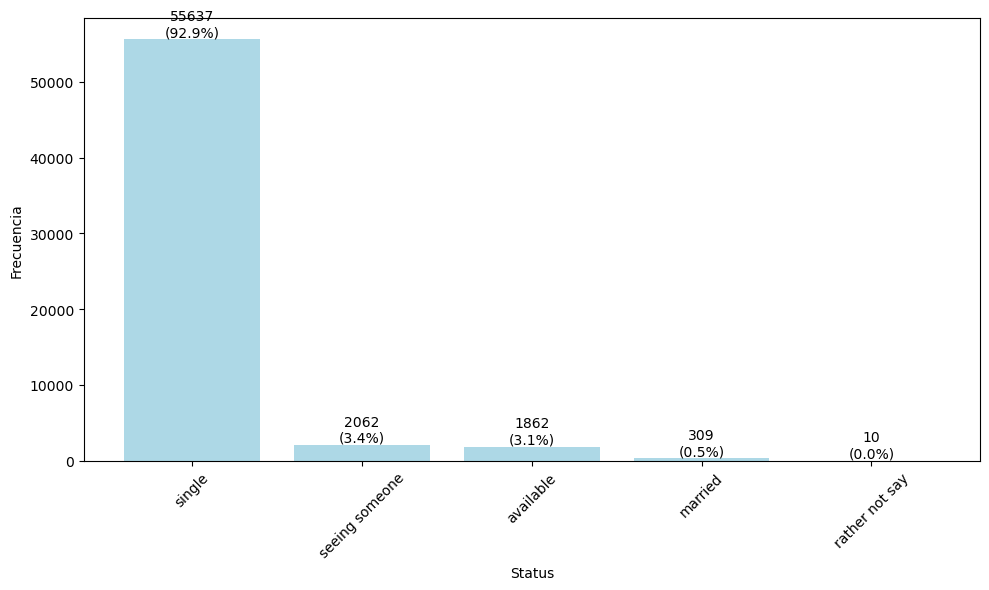

In [168]:
plot_categorical_distribution(data, 'status')
data = data.drop('status', axis=1)

### Género
Hay predominancia de hombres (60%) sobre mujeres (40%) registrados en la plataforma

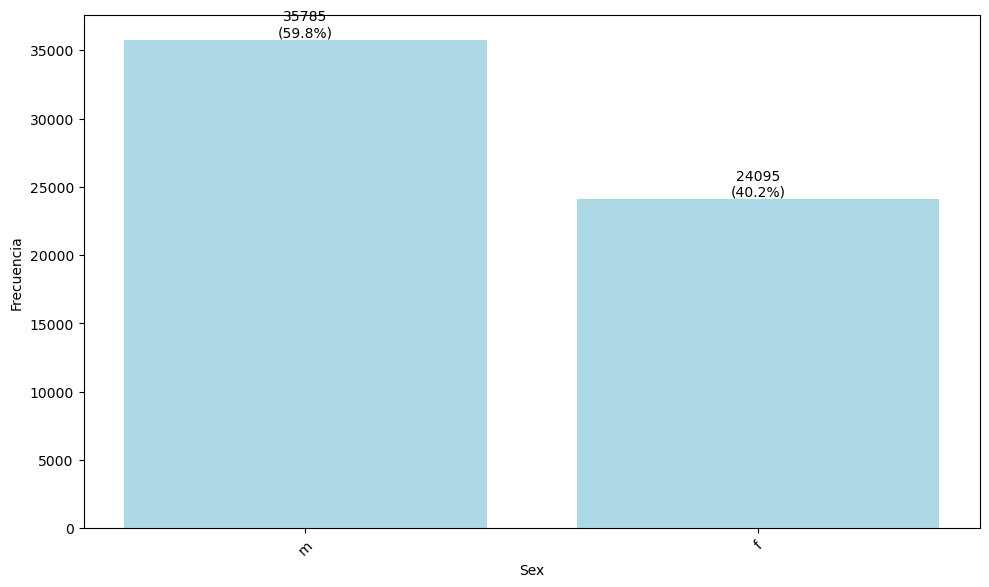

In [169]:
plot_categorical_distribution(data, 'sex')

### Orientación sexual
El 86% son heterosexuales, 9% homosexuales y un 5% de los usuarios se declaran bisexuales

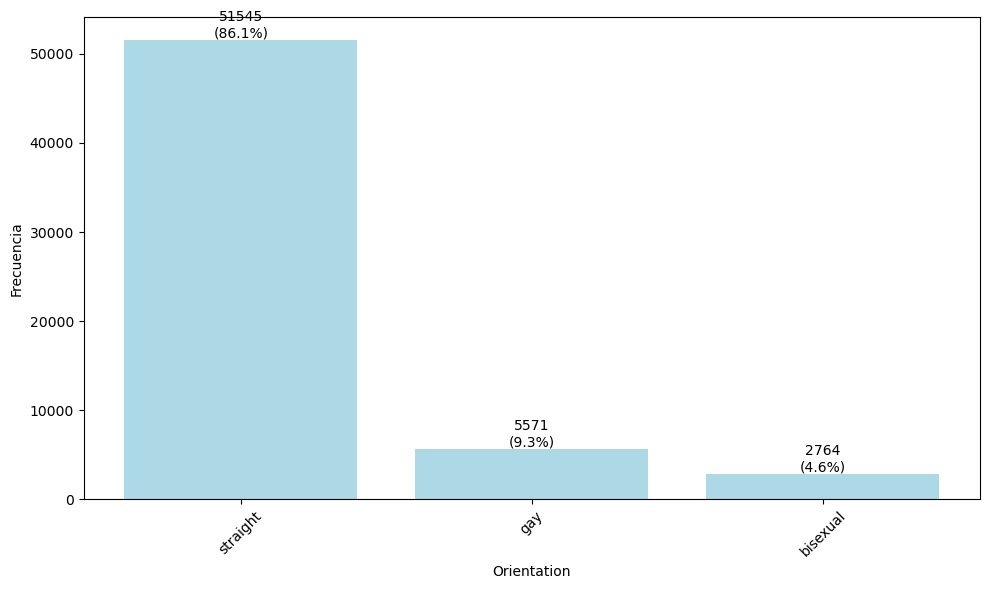

In [170]:
plot_categorical_distribution(data, 'orientation')

### Morfología corporal
Un 42% de los usuarios se declaran en buena forma física, un 25% en la media. Un 13% se declaran con sobrepeso, un 11% delgados, y sorprende el 10% de los usuarios que prefieren no contestar a esta pregunta.

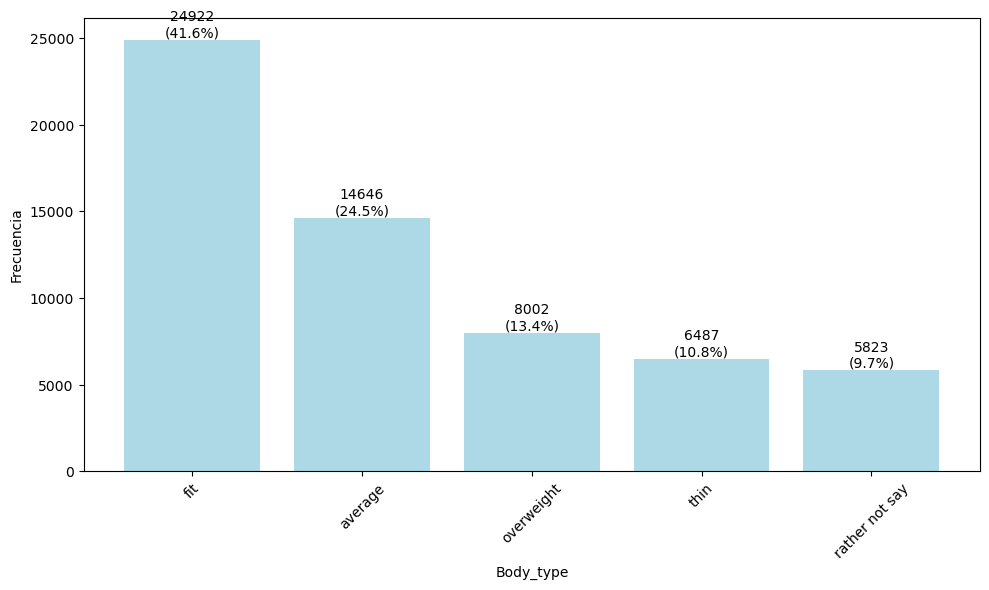

In [171]:
plot_categorical_distribution(data, 'body_type')

### Dieta alimenticia
El 46% de los usuarios come de todo, y el 41% no declara su dieta alimenticia. La opción vegetariana es con un 8% la siguiente opción, siendo testimoniales otros tipos de alimentación. No parece relevante y se elimina.

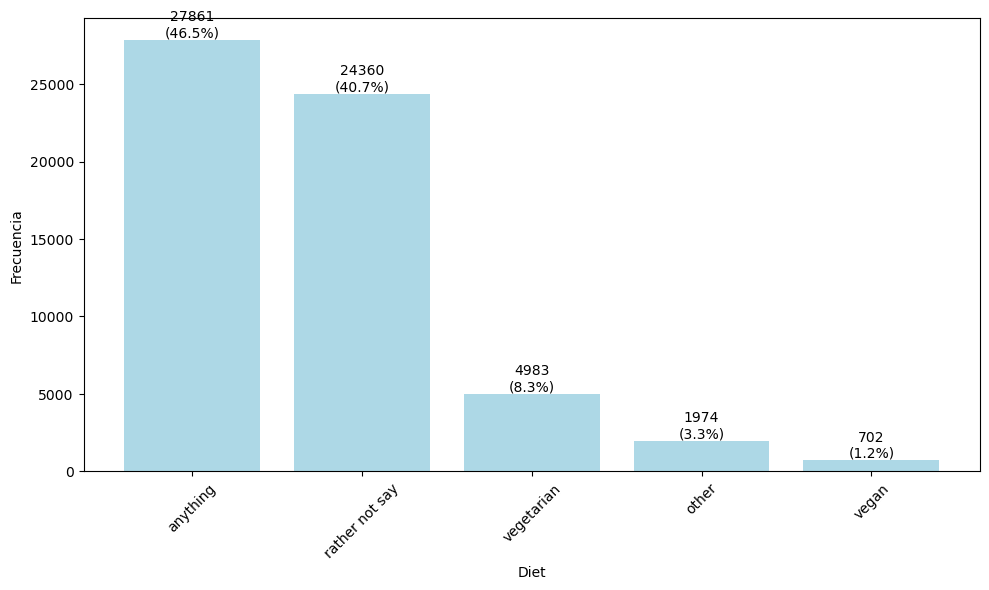

In [172]:
plot_categorical_distribution(data, 'diet')
data = data.drop('diet', axis=1)

### Consumo de alcohol
El 80% se declara consumidor ocasional, un 10% bebedor habitual. Sorprende que solo un 5% de los usuarios no den información acerca de este dato tan personal.

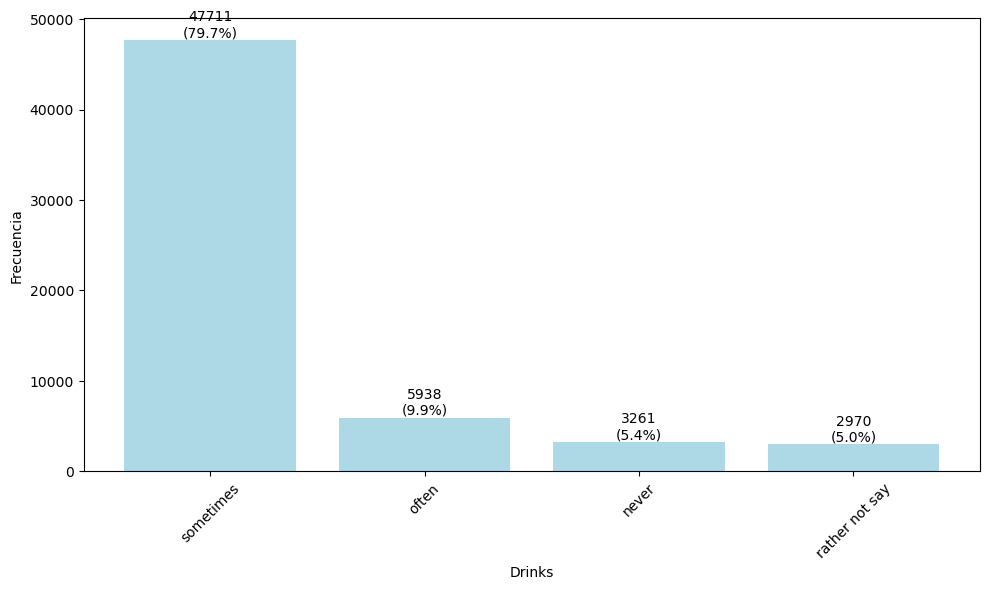

In [173]:
plot_categorical_distribution(data, 'drinks')

### Educación 
El 52% presume de tener estudios universitarios, y el 26% estudios incluso superiores (doctorados, máster). Sólo un 11% de los usuarios no declara su nivel de estudios.

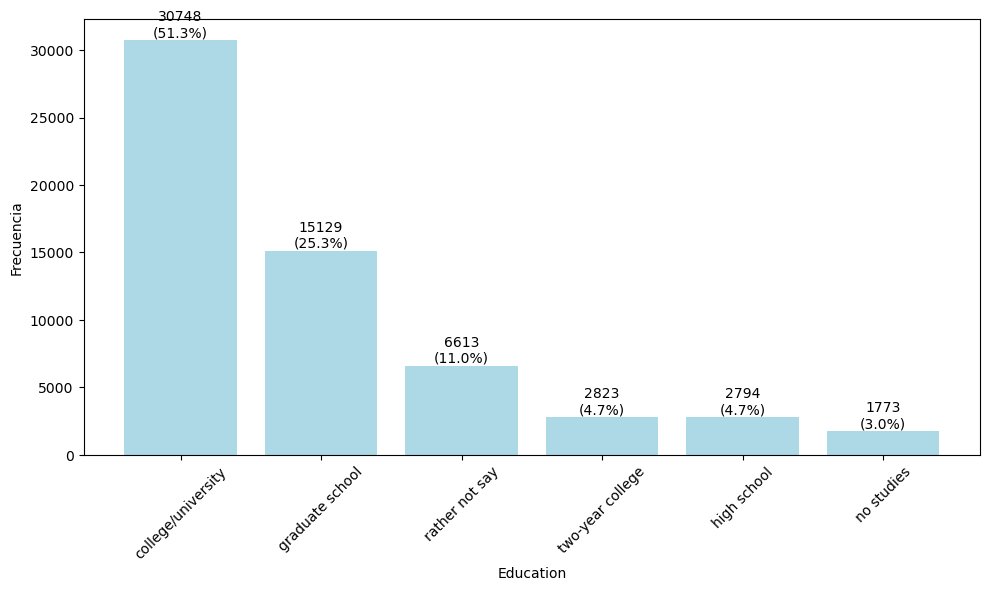

In [174]:
plot_categorical_distribution(data, 'education')

### Grupo étnico
El grupo predominante es el blanco con un 56%, seguido del asiático con un 14%. Sorprende la baja representatividad de grupos tan numerosos en Estados Unidos como los hispanos o los afroamericanos.

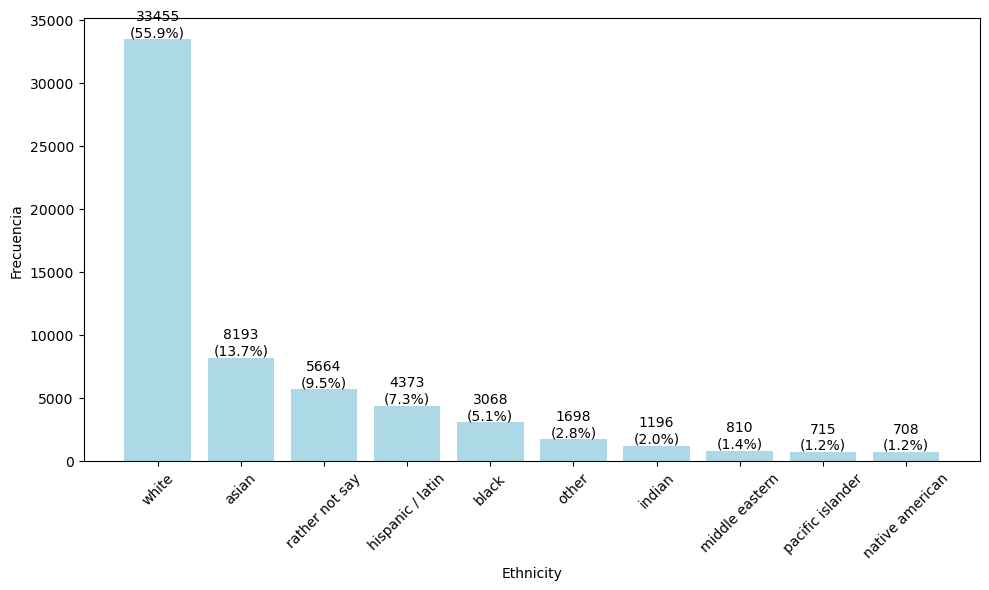

In [175]:
plot_categorical_distribution(data, 'ethnicity')

### Trabajo
El grupo principal lo forman los ingenieros y hombres de negocios, seguidos por los que prefieren no indicar su tipo de trabajo. Los desempleados apenas utilizan la plataforma.

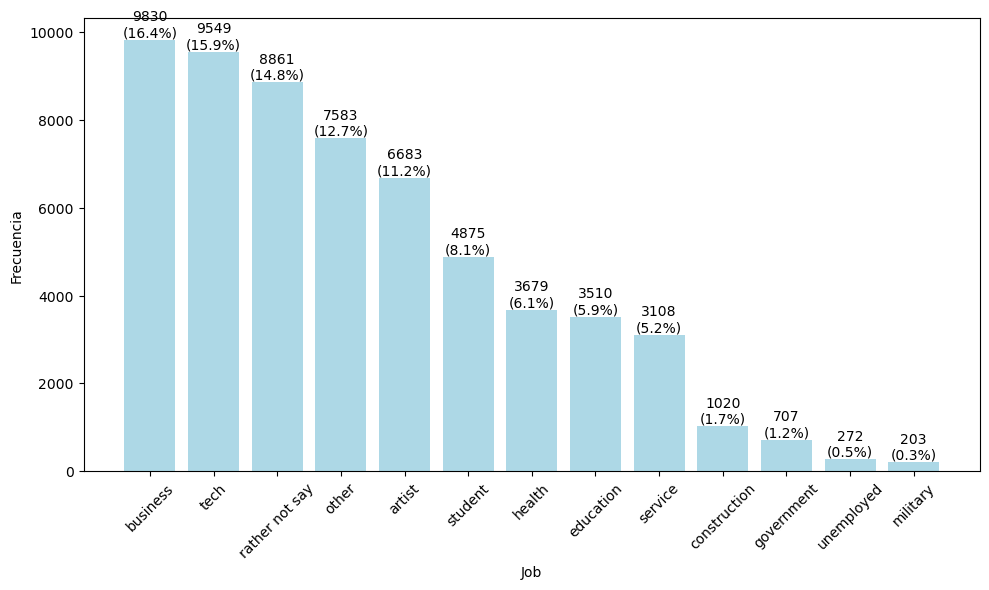

In [176]:
plot_categorical_distribution(data, 'job')

### Religión

La mayoría de los usuarios no declara su religión, posiblemente porque lo ven como una gran barrera de entrada a la hora de entablar relaciones. Predominan los cristianos, agnósticos, y ateos sobre el resto. No consideramos este atributo como relevante a la hora de entablar relaciones de pareja online. 

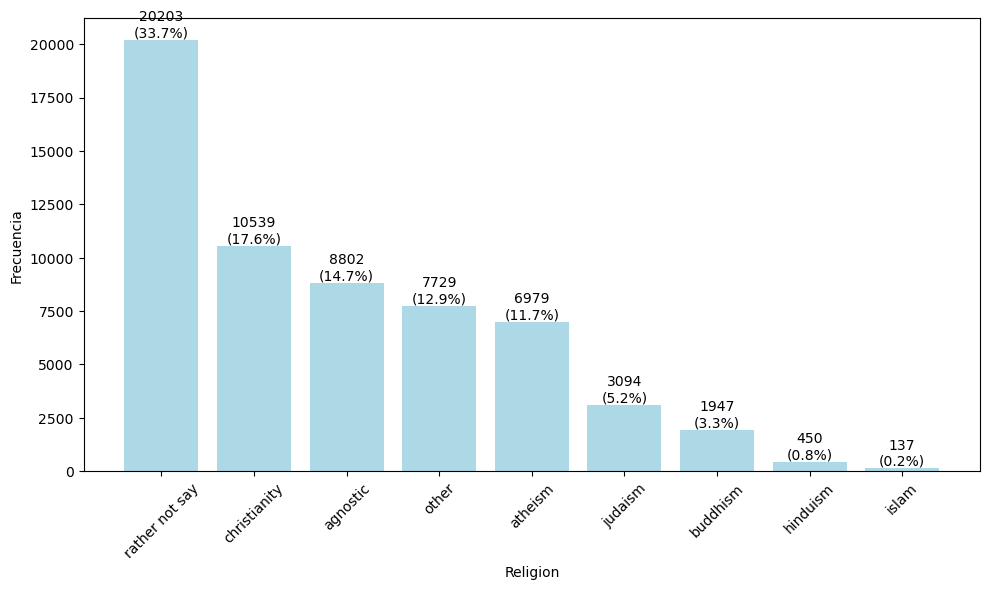

In [177]:
plot_categorical_distribution(data, 'religion')
data = data.drop('religion', axis=1)

### Signo zodiacal
No parece relevante porque la proporción es similar para todos los signos del zodiaco. Se elimina este campo

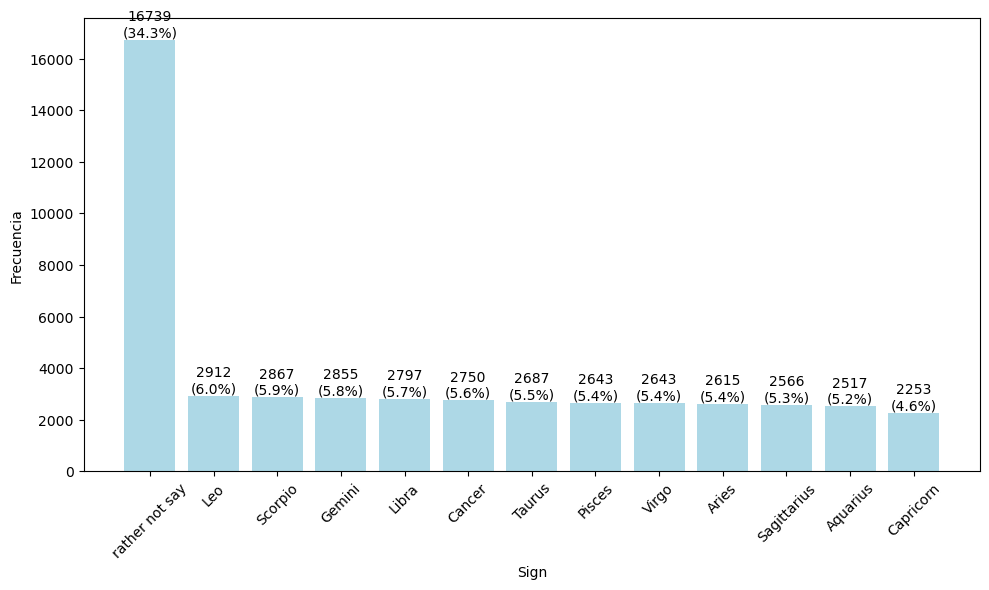

In [178]:
plot_categorical_distribution(data, 'sign')
data = data.drop('sign', axis=1)

### Consumo de tabaco
Otro tema tabú en la sociedad actual. El 73% de los usuarios declara no fumar, sólo un 4% son fumadores habituales, por un 14% de fumadores sociales. La tasa de usuarios que no responde a esta pregunta es doble que a la del consumo de alcohol.

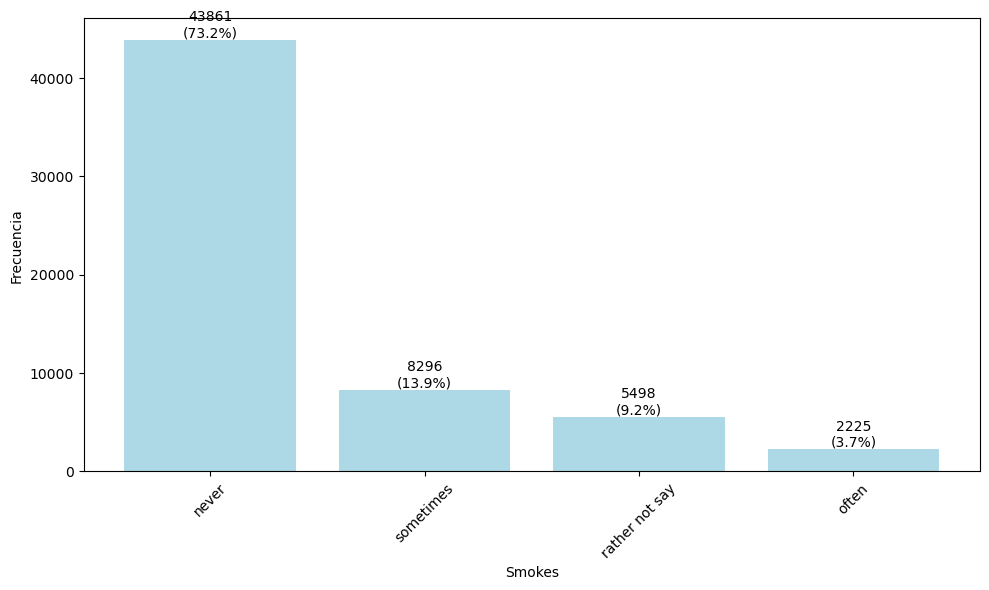

In [179]:
plot_categorical_distribution(data, 'smokes')
data = data.drop('smokes', axis=1)

### Consumo de drogas
Hay una mayor tasa de penetración de las drogas que del tabaco, como así atestigua que un 63% de los usuarios declara no haber tomado drogas nunca. El 23% que no responde a esta pregunta puede estar ocultando algo.

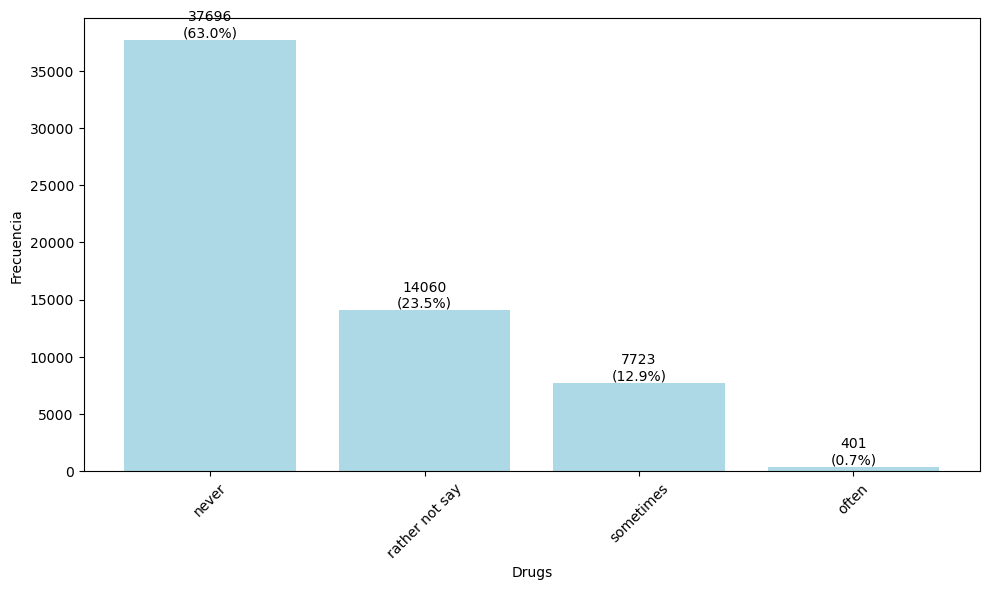

In [180]:
plot_categorical_distribution(data, 'drugs')
data = data.drop('drugs', axis=1)

### Gatos
Un 75% no contesta a la pregunta. Un 18% tiene gatos y un 7% declara no gustarles estos animales.

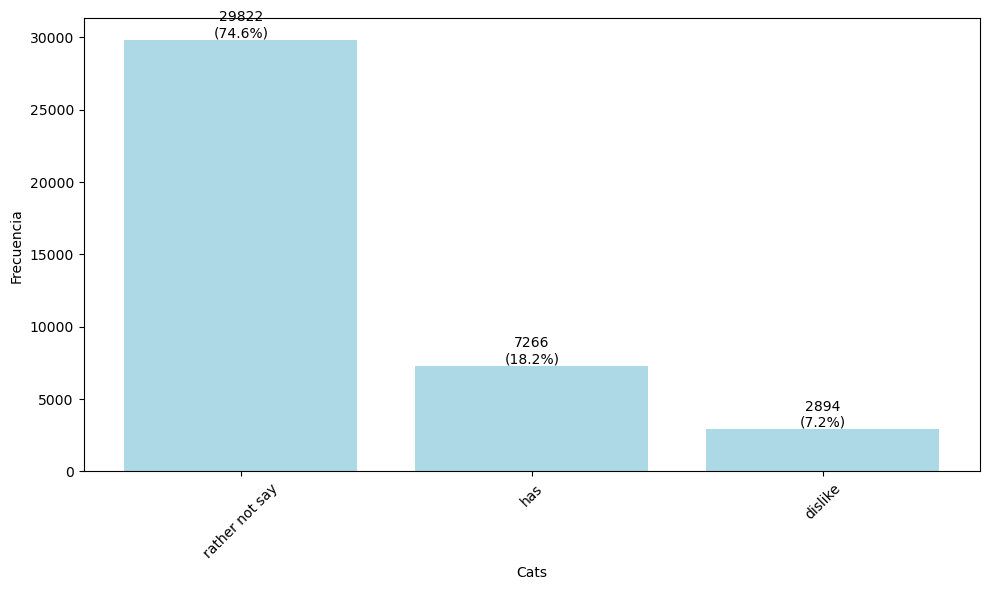

In [181]:
plot_categorical_distribution(data, 'cats')
data = data.drop('cats', axis=1)

### Perros
El 77% no contesta a la pregunta. Un 21% tiene perros.

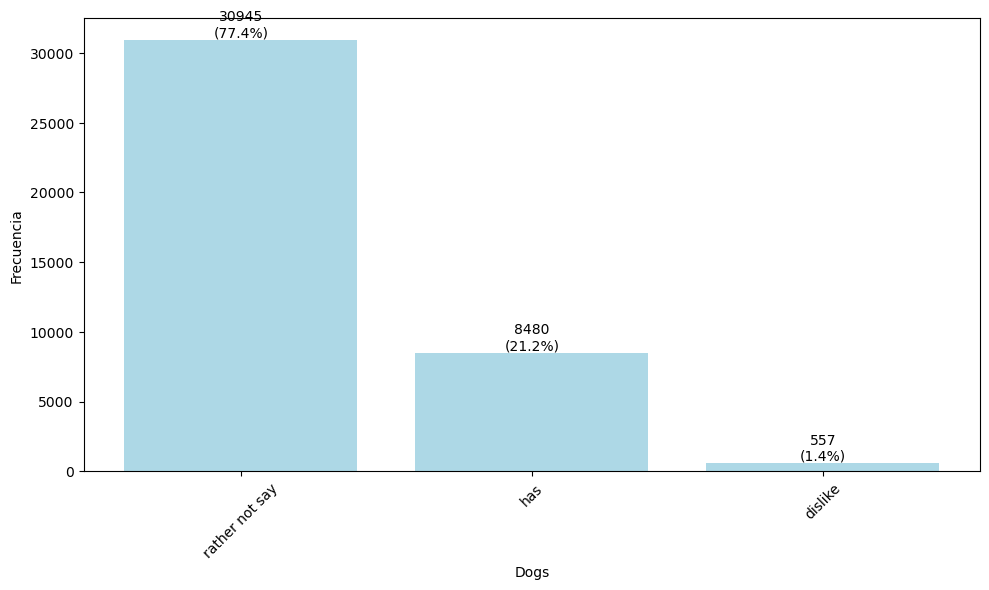

In [182]:
plot_categorical_distribution(data, 'dogs')
data = data.drop('dogs', axis=1)

### Tiene niños
El 66% no contesta a esta pregunta. El 20% reconoce tener niños. No parece un dato muy fiable, lo eliminamos

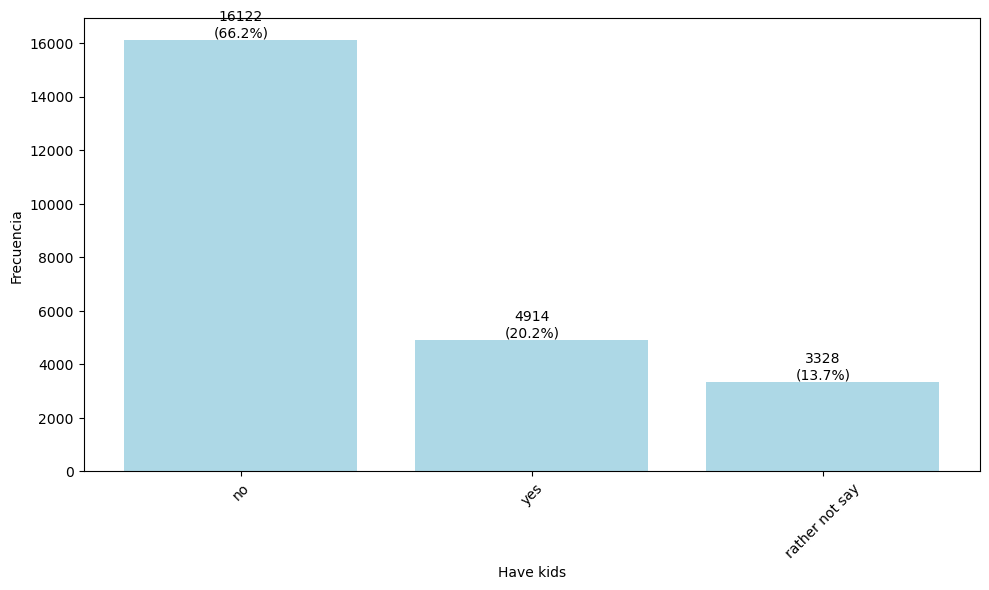

In [210]:
plot_categorical_distribution(data, 'have kids')
data = data.drop('have kids', axis=1)

### Quiere tener niños
El 46% no contesta a la pregunta. Un 34% contesta que si quiere y un 20% que no. Tampoco parece un dato muy fiable.

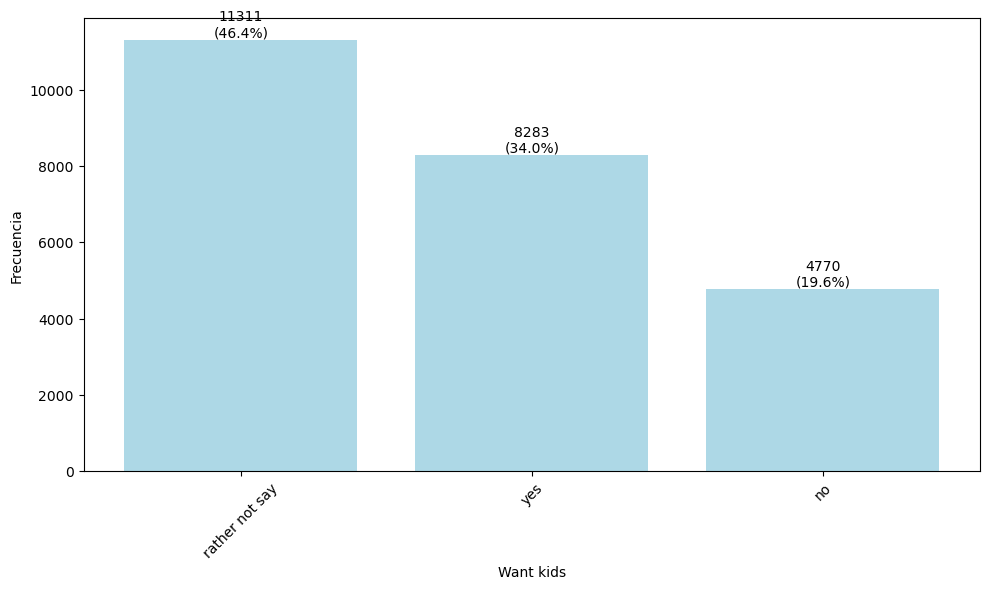

In [211]:
plot_categorical_distribution(data, 'want kids')
data = data.drop('want kids', axis=1)

## Variables cuantitativas

Basaremos el análisis de las variables cuantitativas en la interpretación de su histograma de frecuencias, que nos mostrará como se distribuyen los valores y nos permitirá observar tendencias, así como la media y la mediana. Además, utilizaremos el boxplot, que nos proporcionará una representación gráfica de la dispersión de los datos, destacando la mediana, los valores atipicos y la variabilidad en la distribución de la variable.

In [46]:
# Definimos una función para crear los histogramas y boxplot

def plot_numerical_distribution(data, column_name):
    
    '''
    Esta función crea un histograma y un boxplot para analizar variables cuantitativas.

    Parámetros:
        data (DataFrame): El DataFrame que contiene los datos.
        column_name (str): El nombre de la columna numérica a visualizar.

    Retorna:
        None
    '''
        
    # Generación de estadísticas descriptivas
    description = data[column_name].describe()

    # Generación del Histograma
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column_name], bins=30, kde=True, color='lightblue',
                 line_kws={'color': 'darkblue'})
    
    # Añadimos la media y la mediana
    plt.axvline(data[column_name].median(), color='darkblue', linestyle='--',
                label=f"Mediana: {description['50%']:.1f}")
    plt.axvline(data[column_name].mean(), color='darkblue', linestyle='-',
                label=f"Media: {description['mean']:.1f}")
    
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # Generación del boxplot
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[column_name], color='lightblue')
    
    plt.title(f'{column_name.capitalize()} Boxplot')
    plt.xlabel(column_name.capitalize())
    plt.show()

### Edad
La media está en los 32 años y se trata de una distribución sesgada a la izquierda, donde la mayoría de la población está entre los 20 y los 40 años.

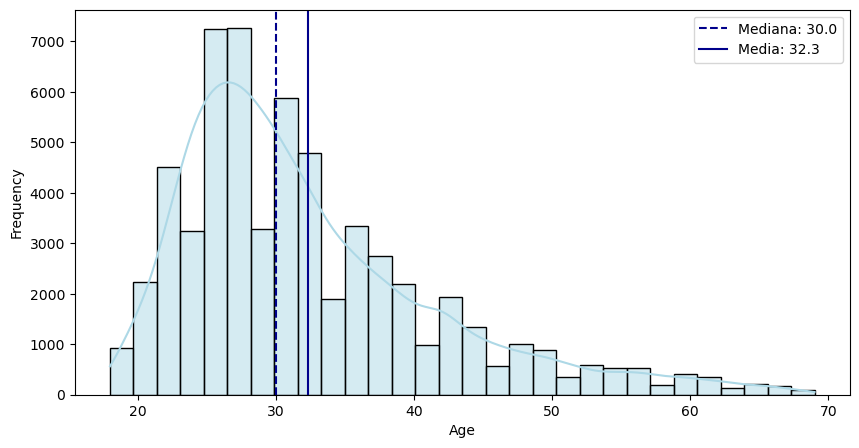

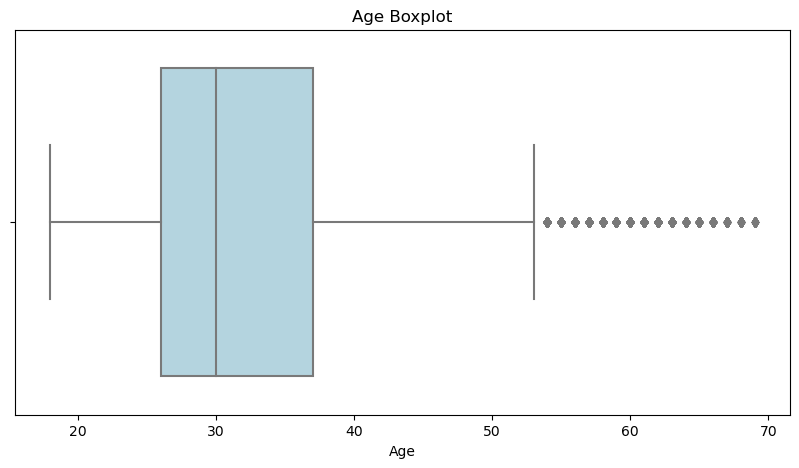

In [47]:
plot_numerical_distribution(data,'age')

Puede tener sentido convertirla en una variable categórica por grupos de edad.

In [48]:
# Definimos los límites de nuestros rangos de edad
bins = [17, 24, 34, 44, 54, 64, 69]

# Definimos los nombres para las categorías de rangos de edad
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-69']

# Creamos la columna age_cateogry
data['age_category'] = pd.cut(data['age'], bins=bins, labels=labels, right=True).astype('category')

# Verificamos las categorías resultantes
print(data['age_category'].value_counts())

25-34    30369
35-44    11905
18-24    10903
45-54     4336
55-64     1997
65-69      370
Name: age_category, dtype: int64


### Altura
A priori no parece una variable relevante para la búsqueda de pareja. Aún así, vamos a analizarla.
Sigue una distribución normal con una media en 1,73 centímetros y considerando como valores extremos a personas por debajo de 1.5 metros y por encima de los 2 metros.

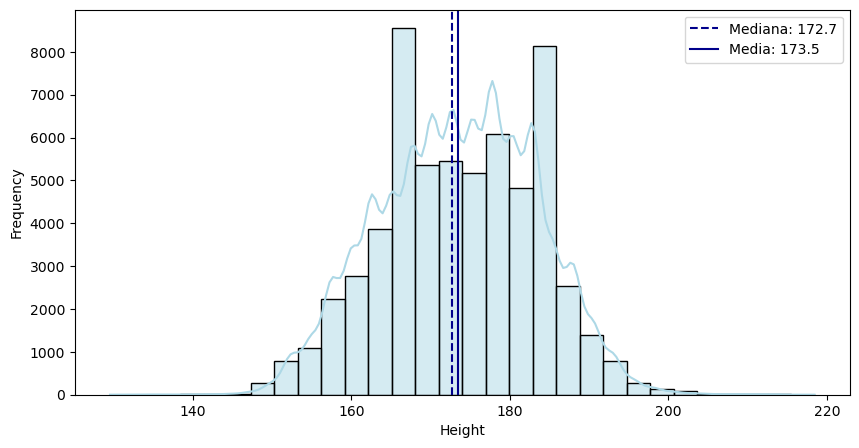

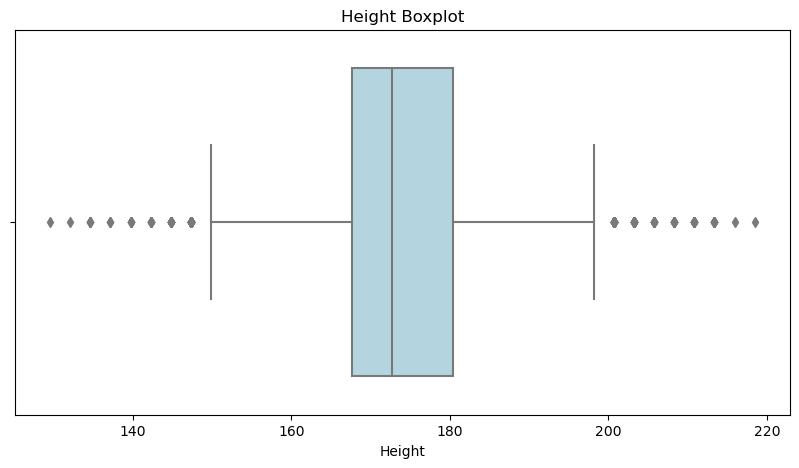

In [49]:
plot_numerical_distribution(data, 'height')

Creamos también una variable categórica a partir de la altura

In [50]:
# Categorizamos la altura separando por género
height_cuts = {
    'm': {'short': 165, 'average': 175, 'tall': 185},  
    'f': {'short': 155, 'average': 165, 'tall': 175}   
}

# Definimos una función para hacer esta categorización
def categorize_height(row):
    '''
    Función para categorizar la altura en función del género
    Input: fila del dataframe a convertir
    Output: categoría
    '''
    # Obtenemos los puntos de corte para el género de la fila
    cuts = height_cuts[row['sex']]
    if row['height'] < cuts['short']:
        return 'short'
    elif row['height'] < cuts['average']:
        return 'average'
    elif row['height'] <= cuts['tall']:
        return 'average'
    else:
        return 'tall'

# Aplicamos la función
data['height_category'] = data.apply(categorize_height, axis=1).astype('category')
print(data['height_category'].value_counts())

average    46482
tall       10639
short       2759
Name: height_category, dtype: int64


### Ingresos
Se trata de una distribución claramente sesgada a la izquierda, en la que la media salarial está en los 100.000 dolares. Sin embargo, el hecho de que haya valores extremos como usuarios que declaran ganar hasta 1.000.000 de dolares, hace que tenga mas sentido usar el valor de la mediana como más descriptivo del salario medio, en este caso de 50.000. 

No se eliminan previamente los valores extremos de la variable porque creemos que tiene su peso muy relevante a la hora de encontrar pareja.

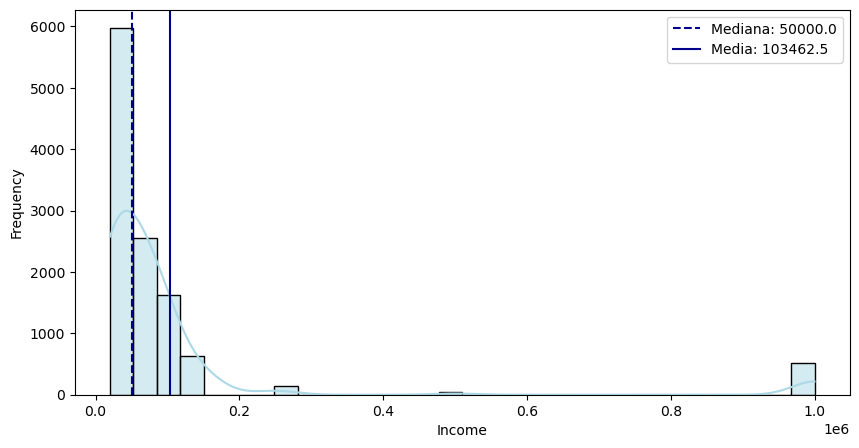

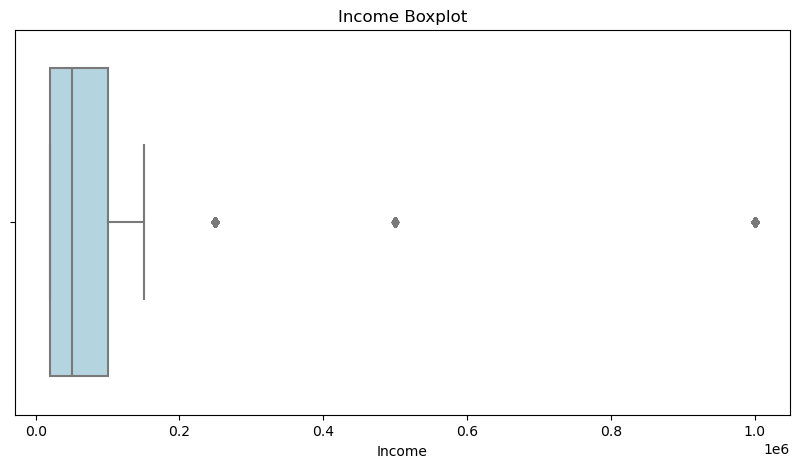

In [51]:
plot_numerical_distribution(data, 'income')

Categorizamos también los ingresos en altos, bajos o medios

In [52]:
# Definimos los límites de nuestros rangos de ingresos
bins = [0, 35000, 140000, float('inf')]

# Definimos los nombres de las categorías
labels = ['low', 'average', 'high']

# Dividimos la columna 'income' en categorías
data['income_category'] = pd.cut(data['income'], bins=bins, labels=labels, right=False)
print(data['income_category'].value_counts())

average    6153
low        3994
high       1333
Name: income_category, dtype: int64


# Análisis bivariante

El análisis bivariante se centra en el estudio de las relaciones entre dos variables. Analiza como dos variables diferentes se comportan en conjunto o cómo una variable afecta a la otra. Este tipo de análisis ayuda a identificar patrones, correlaciones, dependencias o diferencias entre las dos variables.

En este estudio, vamos a realizar un análisis bivariante entre la variable género y el resto de variables categóricas. Para ello vamos a ejecutar 3 acciones:

* Generar una tabla de contigencia en la que se muestre la frecuencia de cada categoría de la variable de interés desglosada por género.
* Hacer un test chi-cuadrado para determinar si hay una asociación significativa entre las dos variables categóricas. Un valor del parámetro p bajo indicará que las diferencias en las frecuencias observadas son estadísticamente significativas y no se deben al azar.
* Crear un gráfico de barras que ilustre la distribución de las categorías de la variable de interés en función del género.

In [53]:
# Definimos una función para hacer el análisis bivariante ente cualquier variable categórica y género

def generate_bivariate_analysis_and_chi2(data, category_var, target_var='sex'):
    
    '''
    Realiza un análisis bivariante entre dos variables categóricas 
    y calcula el test chi-cuadrado de independencia.

    Parámetros:
        data (DataFrame): El DataFrame que contiene los datos.
        category_var (str): El nombre de la variable categórica a analizar.
        target_var (str): El nombre de la variable objetivo para el análisis (por defecto es 'sex').

    Retorna:
        chi2_results (dict): Un diccionario con los resultados del test chi-cuadrado.
        contingency_table_abs (DataFrame): Tabla de contingencia en valores absolutos.
        contingency_table_rel (DataFrame): Tabla de contingencia en valores relativos por género.
    '''
    
    # Creamos la tabla de contingencia en valores absolutos
    contingency_table_abs = pd.crosstab(data[target_var], data[category_var])

    # Creamos la tabla de contingencia en valores relativos por género
    contingency_table_rel = pd.crosstab(data[target_var], data[category_var], normalize='index') * 100

    # Ordenamos las categorías en orden descendente
    ordered_categories = contingency_table_abs.sum(axis=0).sort_values(ascending=False).index

    # Test chi-cuadrado
    chi2, p, dof, expected = chi2_contingency(contingency_table_abs)
    chi2_results = {'Chi-square': chi2, 'p-value': p, 'Degrees of freedom': dof}

    # Ploteamos el gráfico de barras
    plt.figure(figsize=(14, 7))
    ax = sns.countplot(x=category_var, hue=target_var, data=data, order=ordered_categories,
                       palette={'m': 'lightblue', 'f': 'darkblue'})
    ax.grid(False)

    for i, bar in enumerate(ax.patches):
        height = bar.get_height()
        n_categories = len(ordered_categories)
        gender = 'f' if i < n_categories else 'm'
        category = ordered_categories[i % n_categories]
        rel_value = contingency_table_rel.loc[gender, category]
        ax.annotate(f"{int(height)}\n({rel_value:.1f}%)", 
                    (bar.get_x() + bar.get_width() / 2., height), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')
    plt.xlabel(category_var.capitalize())
    plt.ylabel('Frecuencia')
    plt.legend(title='Género', loc='upper right')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    return chi2_results, contingency_table_abs, contingency_table_rel

### orientation

Mientras que los porcentajes de hombres y mujeres que se declaran heterosexuales es similar, se aprecia predominio de hombres sobre mujeres homosexuales, predominando éstas en la categoría de bisexuales. 
El valor tan alto de chi-cuadrado indica una alta relación entre las variables de orientación sexual y género. El valor de p igual a 0.0 se interpreta como una probabilidad extremadamente baja de que la asociación observada en los datos sea al azar. La hipótesis nula (la suposición de que no hay relación entre las variables) puede ser rechazada con total confianza.

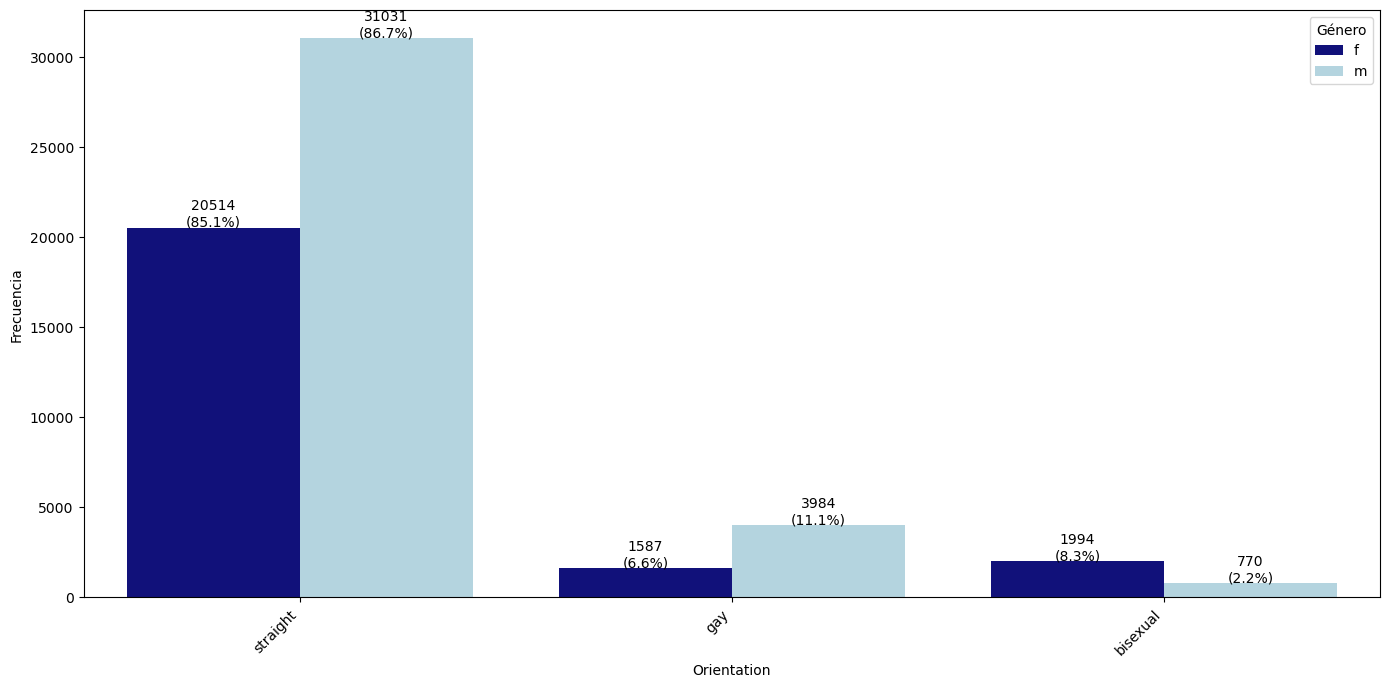

{'Chi-square': 1493.9869884919476, 'p-value': 0.0, 'Degrees of freedom': 2}


In [54]:
chi2_test_results, contingency_table_abs, contingency_table_rel = generate_bivariate_analysis_and_chi2(data, 'orientation', target_var='sex')
print(chi2_test_results)

### body_type
La mitad de los hombres se declaran en forma, mientras que sólo un 28% de las mujeres declara estar en esta categoría. Un 23% de las mujeres se declaran en sobrepeso por un 7% de los hombres.
Los parámetros estadísticos nos indican que hay una alta relación entre ambas variables que no es fruto del azar.

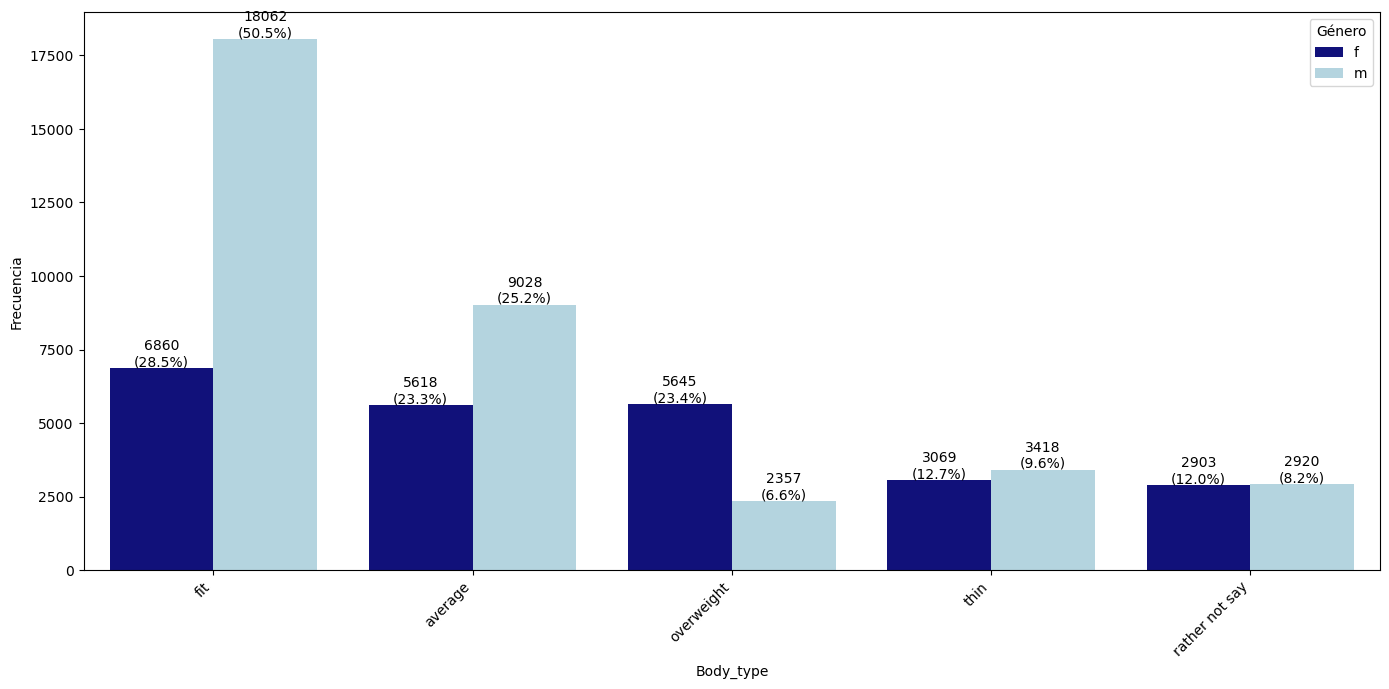

{'Chi-square': 5111.548452371095, 'p-value': 0.0, 'Degrees of freedom': 4}


In [55]:
chi2_test_results, contingency_table_abs, contingency_table_rel = generate_bivariate_analysis_and_chi2(data, 'body_type', target_var='sex')
print(chi2_test_results)

### drinks
No existen prácticamente diferencias de género a la hora de declarar lo que beben. En todas las categorías los resultados son similares.

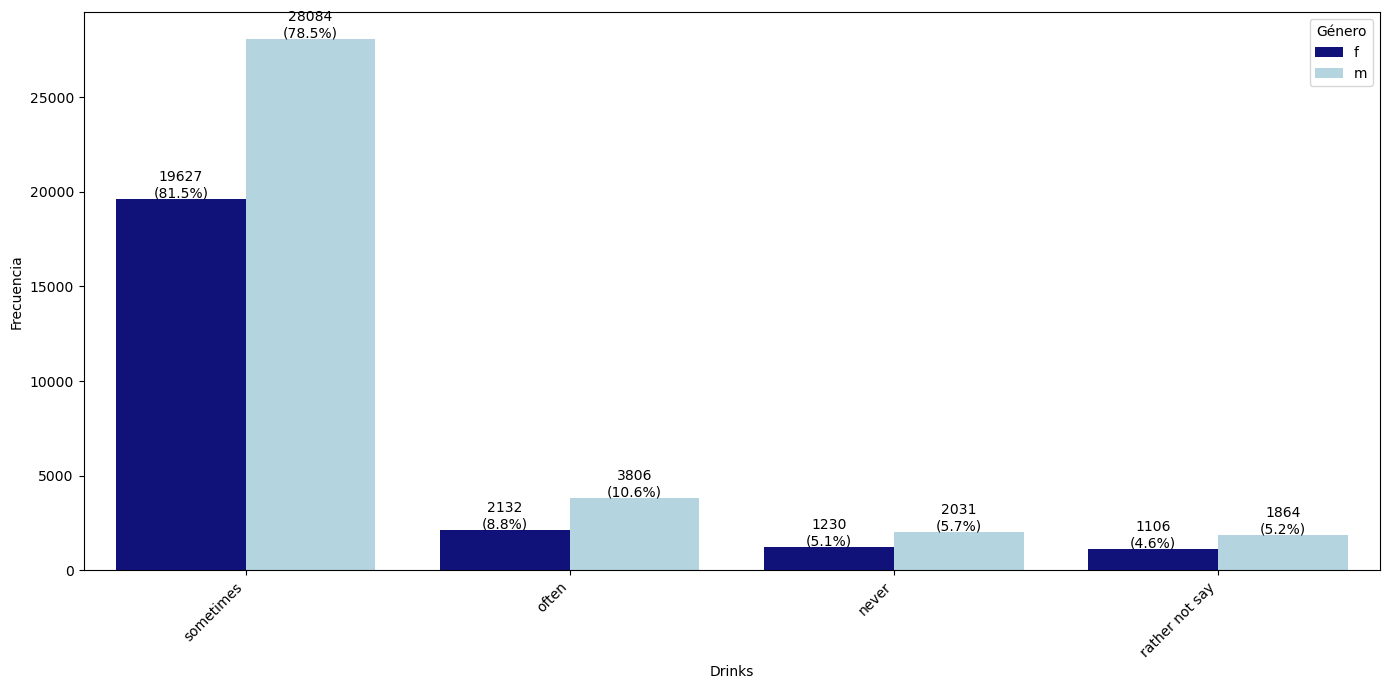

{'Chi-square': 82.13575772840079, 'p-value': 1.0686788141080124e-17, 'Degrees of freedom': 3}


In [56]:
chi2_test_results, contingency_table_abs, contingency_table_rel = generate_bivariate_analysis_and_chi2(data, 'drinks')
print(chi2_test_results)

### education
Tampoco hay mucha diferencia de género en función de la educación, todos los porcentajes son similares independientemente del género.

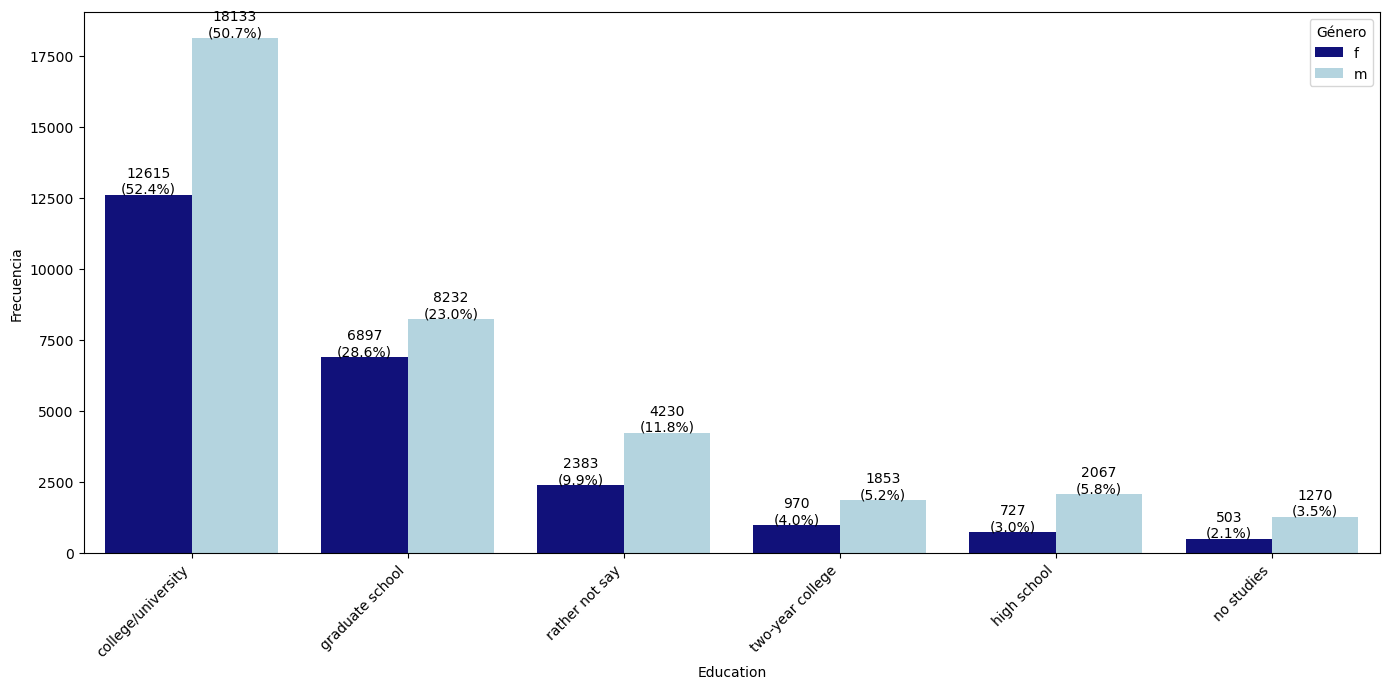

{'Chi-square': 615.8853642550692, 'p-value': 7.470931994584685e-131, 'Degrees of freedom': 5}


In [57]:
chi2_test_results, contingency_table_abs, contingency_table_rel = generate_bivariate_analysis_and_chi2(data, 'education')
print(chi2_test_results)

### ethnicity
La mayoría de los usuarios son varones de raza blanca, las proporciones entre hombre y mujerparece que se mantienen iguales entre todas las razas, excepto en el caso de la raza hindú donde la proporción es prácticamente de 3 a 1.

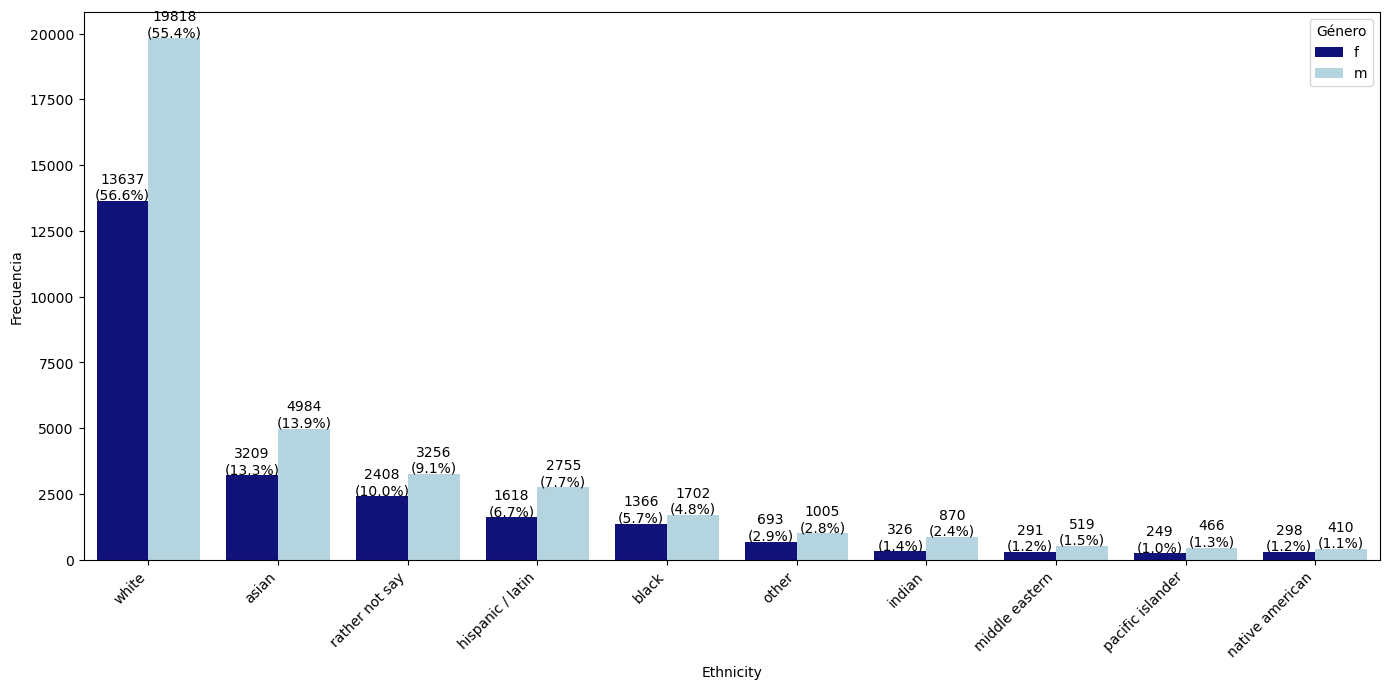

{'Chi-square': 162.4553596249857, 'p-value': 2.2933488070174376e-30, 'Degrees of freedom': 9}


In [58]:
chi2_test_results, contingency_table_abs, contingency_table_rel = generate_bivariate_analysis_and_chi2(data, 'ethnicity')
print(chi2_test_results)

### job
Aquí si apreciamos diferencias en el sector tecnológico y construcción a favor de los hombres, y en el sector sanitario y educativo a favor de las mujeres. En el resto de categorías no hay diferencias significativas

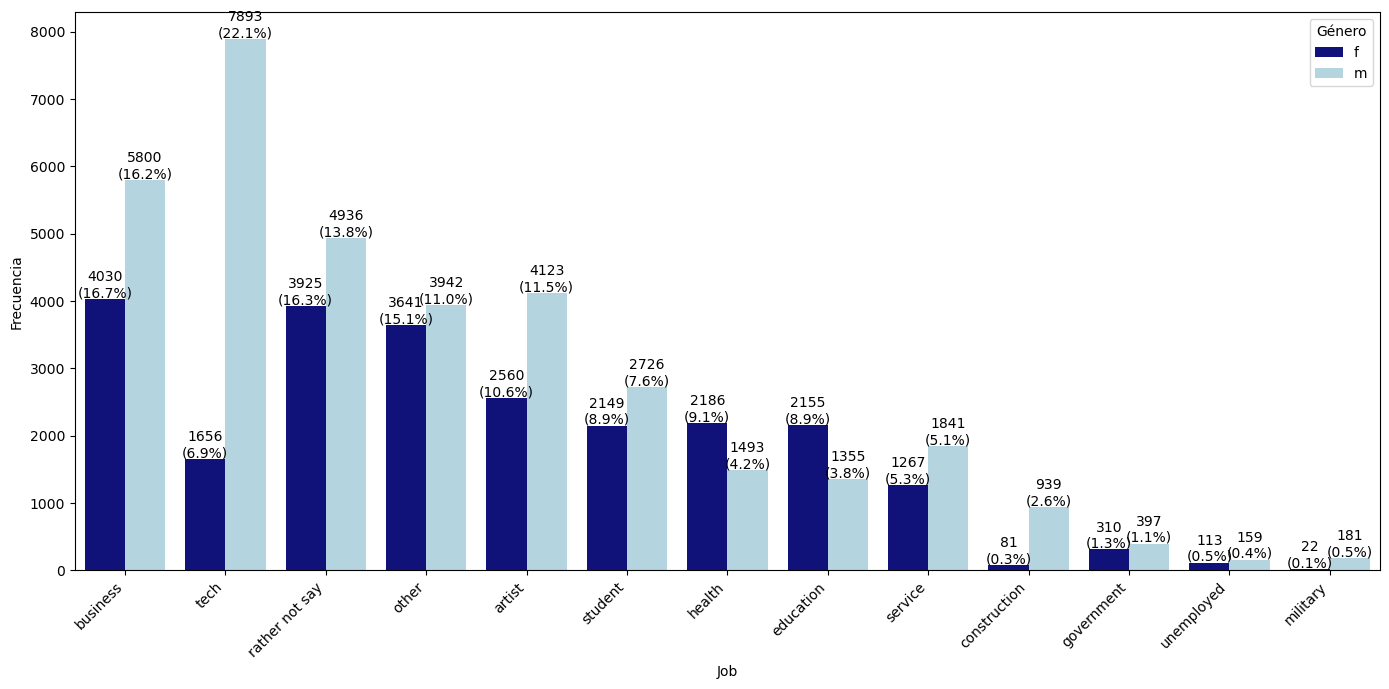

{'Chi-square': 4111.769833859258, 'p-value': 0.0, 'Degrees of freedom': 12}


In [59]:
chi2_test_results, contingency_table_abs, contingency_table_rel = generate_bivariate_analysis_and_chi2(data, 'job')
print(chi2_test_results)

### age_category
Predominan en la plataforma las personas de edad media

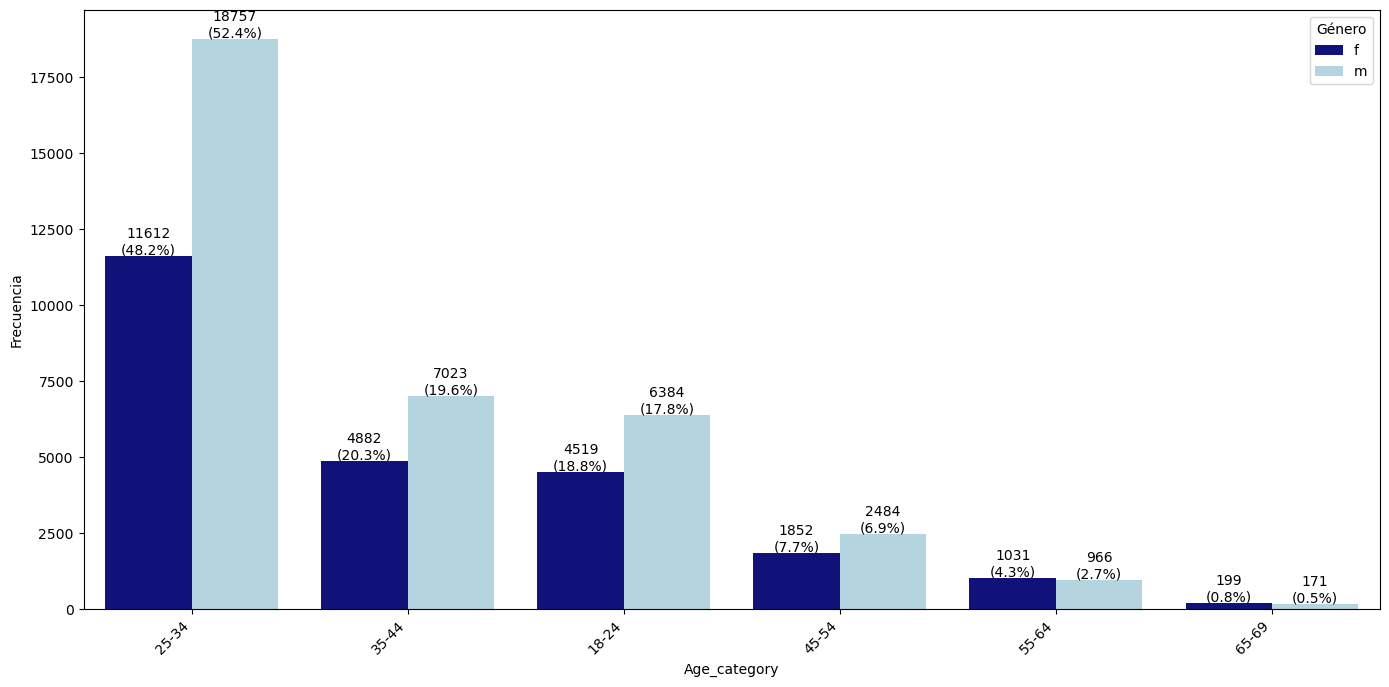

{'Chi-square': 207.1599700512672, 'p-value': 8.343256103143476e-43, 'Degrees of freedom': 5}


In [60]:
chi2_test_results, contingency_table_abs, contingency_table_rel = generate_bivariate_analysis_and_chi2(data, 'age_category')
print(chi2_test_results)

### height_category
Los resultados aquí son los esperados, hay más hombres altos que mujeres, y más mujeres bajas que hombres. En la media, más mujeres que hombres.

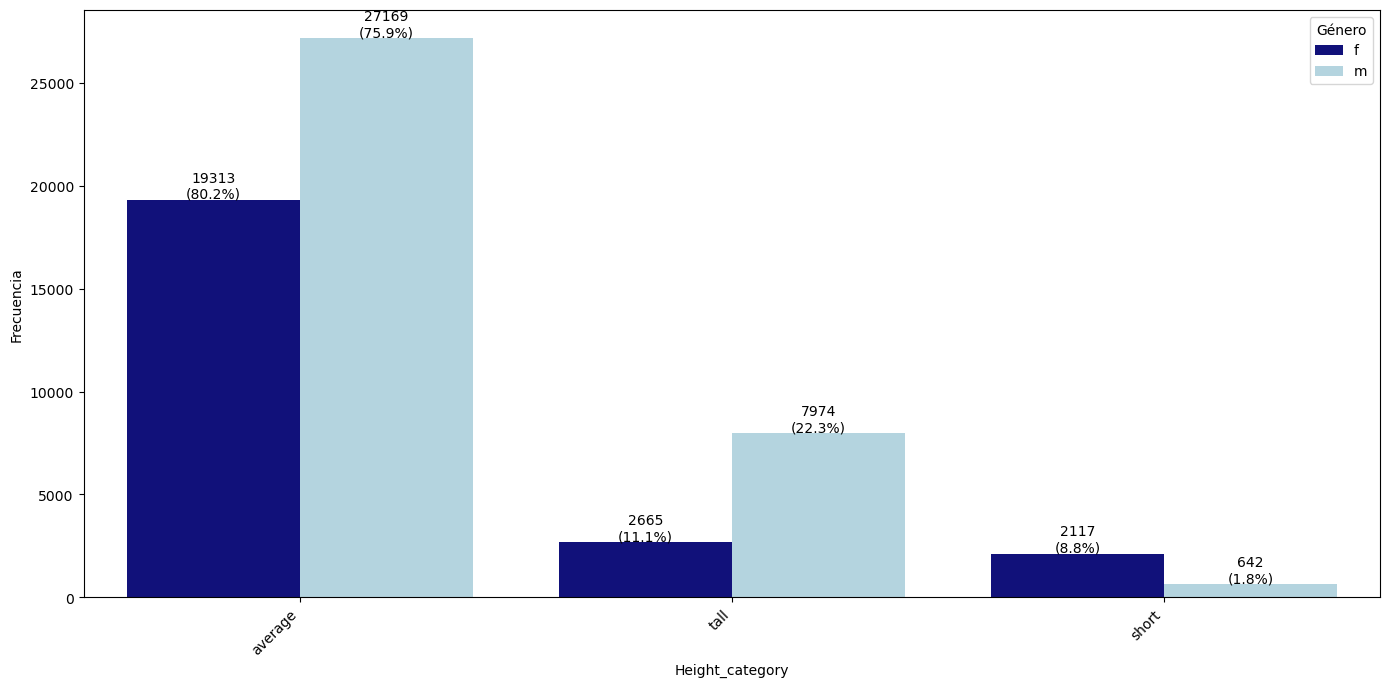

{'Chi-square': 2581.8041629538507, 'p-value': 0.0, 'Degrees of freedom': 2}


In [61]:
chi2_test_results, contingency_table_abs, contingency_table_rel = generate_bivariate_analysis_and_chi2(data, 'height_category')
print(chi2_test_results)
data = data.drop('height_category',axis=1)

### income_category
El último análisis es sobre salarios, dónde se aprecia que hay más mujeres en el grupo de salarios bajos y más hombres en el grupo de salarios altos. Todavía falta por llegar a la igualdad en este tema.

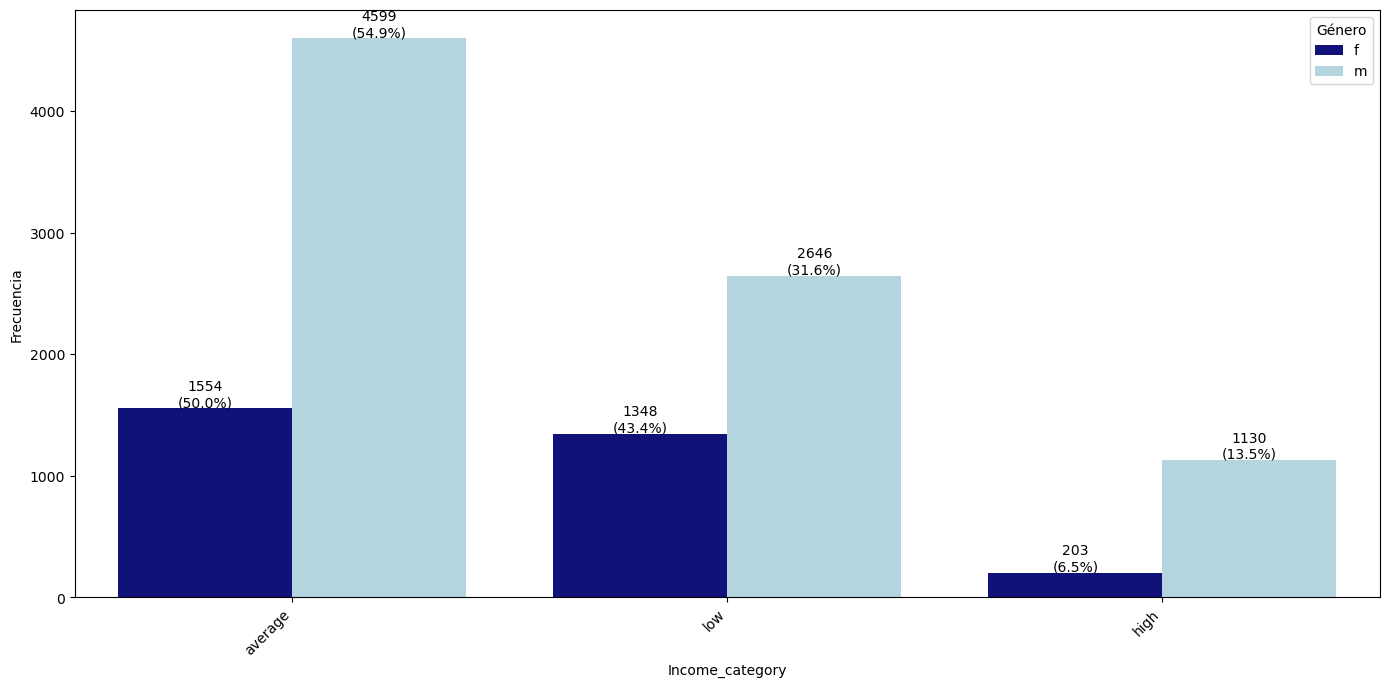

{'Chi-square': 195.32202975011907, 'p-value': 3.8579815171413066e-43, 'Degrees of freedom': 2}


In [62]:
chi2_test_results, contingency_table_abs, contingency_table_rel = generate_bivariate_analysis_and_chi2(data, 'income_category')
print(chi2_test_results)

# Análisis de clústering

En este capítulo exploraremos como utilizar el clustering para agrupar usuarios en grupos de perfiles similares en función de sus atributos categóricos. En una fase posterior añadiremos las variables de texto libre para enriquecer estos grupos.

El análisis de clustering es una técnica de aprendizaje automático no supervisado que se utiliza para descubrir patrones naturales y estructuras en un conjunto de datos. Su objetivo principal es agrupar elementos de un conjunto de datos en clústers, donde los elementos dentro de un mismo grupo son más similares entre sí que con los elementos de otros grupos.

Empezamos cargando librerías específicas de estas técnicas como:

* OneHotEncoder: se utiliza para convertir variables categóricas en variables numéricas mediante codificación one-hot. Para ello, crea unas columnas binarias para cada categoría original y asigna un valor 1 ó 0 en función de la presencia o ausencia de esa categoría.
* PCA: el análisis de componentes principales es una técnica de reduccion de dimensionalidad que transforma las características originales en un nuevo conjunto de características no correlacionadas llamadas componentes principales. Sirve para reducir el número de dimensiones de un conjunto de datos mientras se preserva la mayor cantidad posible de información.
* KMeans: es un algoritmo de clustering que agrupa datos en k clústeres basados en la similitud de sus catacterísticas.

Existen muchos otros algoritmos de clustering como el algomerativo, DBSCAN, GMM, entre otros. Debido a la magnitud del conjunto de datos vamos a utilizar Kmeans por su eficiencia y escalabilidad por el gran número de variables a considerar. 

Para ejecutar este proceso, primero seleccionamos la columnas de interés que son todas categóricas, a continuación aplicamos el algoritmo OneHotEncoder para generar columnas binarias con la presencia/ausencia de cada categoría en cada uno de los registros.

Reducimos la dimensionalidad del dataset utilizando el análisis de componentes principales. En este caso retenemos el 95% de la varianza explicada por los datos originales para no perder demasiada información.

El método del codo nos determina el número óptimo de clústers, para ello calculamos la inercia que es una medida de cuánto se extienden los puntos de datos dentro de cada clúster. Cuanto menor sea la inercia, más compactos y similares son los puntos dentro de cada clúster. El número óptimo se encuentra en el punto de inflexión de la gráfica (codo), cómo no se aprecia claramente cuál es este punto de interés utilizaremos otra técnica. 

In [63]:
# Importamos librerías específicas de scikit-learn
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

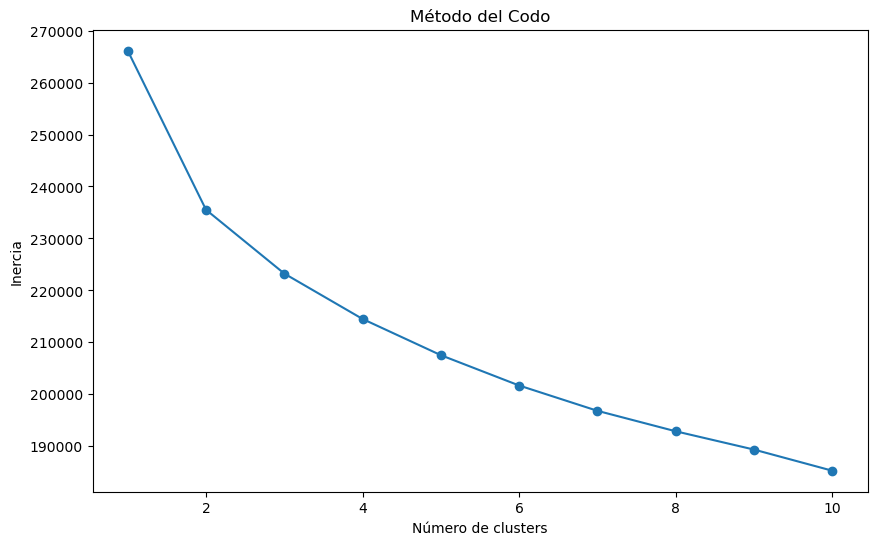

In [64]:
# Seleccionamos las columnas de interés
columns_of_interest = ['sex', 'age_category', 'body_type', 'orientation', 'ethnicity', 'drinks', 'education', 'job']
data_selected = data[columns_of_interest]

# Aplicamos el one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
data_encoded = encoder.fit_transform(data_selected)

# Reducimos la dimensionalidad con PCA
pca = PCA(n_components=0.95)
data_reduced = pca.fit_transform(data_encoded)

# Aplicamos el método del codo para determinar el número óptimo de clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)
    kmeans.fit(data_reduced)
    inertia.append(kmeans.inertia_)

# Ploteamos el resultado del método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

El índice de Silhouette es una métrica que evalúa la calidad interna de un clustering. Se basa únicamente en la estructura de datos y no requiere etiquetado previo, por lo que es útil cuando no se tiene un conocimiento previo de cuántos clústers deberían existir.
Al calcular el índice de silhoutte para distintos valores de k podemos identificar el número de clústers que producen la mayor puntuación de silhouette promedio. Este valor de k se considera el número óptimo de clústers según el índice de Silhouette.

A pesar de que el índice muestra un valor óptimo en 1, vamos a elegir 9 como número de clústeres a determinar porque entendemos que en una población de 60.000 personas hacer menos de 9 grupos no tiene mucho sentido.

C:\Users\gabriel.romero\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gabriel.romero\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gabriel.romero\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gabriel.romero\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

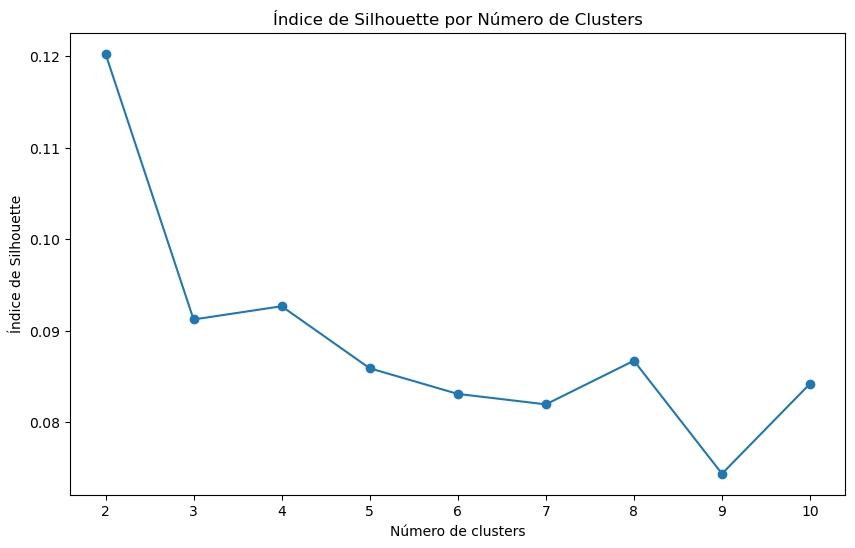

In [65]:
from sklearn.metrics import silhouette_score

# Calculamos el índice de Silhouette para diferentes números de clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    clusters = kmeans.fit_predict(data_reduced)
    score = silhouette_score(data_reduced, clusters)
    silhouette_scores.append(score)

# Ploteamos el índice de Silhouette
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Índice de Silhouette por Número de Clusters')
plt.xlabel('Número de clusters')
plt.ylabel('Índice de Silhouette')
plt.show()

In [66]:
# Realizamos el Kmeans con k=4
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
clusters = kmeans.fit_predict(data_reduced)

# Añadimos los resultados al dataframe
data['cluster'] = clusters


Vamos a obtener una descripción de cada clúster para entender mejor los perfiles de usuarios dentro de cada grupo.

In [67]:
# Creamos un diccionario para almacenar los datos
data_dict = {}

# Iteramos a lo largo de cada clúster
for i in range(4):
    cluster_data = data[data['cluster'] == i]
    cluster_info = {'Cluster': i}
    total_elements = len(cluster_data)  # Calculamos el total de elementos en el clúster

    # Iteramos a lo largo de las columnas para obtener los valores más comunes y calcular sus porcentajes
    for col in columns_of_interest:
        most_common = cluster_data[col].mode()[0]
        cluster_info[col] = most_common
        percentage_col_name = f'% {col}'  # Nombre de la columna de porcentaje
        count_most_common = (cluster_data[col] == most_common).sum()  # Contamos elementos con el valor más común
        cluster_info[percentage_col_name] = f'{(count_most_common / total_elements) * 100:.0f}%'  # Calculamos el porcentaje

    data_dict[i] = cluster_info

# Creamos un DataFrame a partir del diccionario
df = pd.DataFrame.from_dict(data_dict, orient='index')

# Creamos una lista con el orden de las columnas
column_order = ['Cluster']
for col in columns_of_interest:
    column_order.append(col)
    column_order.append(f'% {col}')

# Visualizamos el resultado
df = df[column_order]
df

Cluster sex % sex age_category % age_category body_type % body_type  \
0        0   f  100%        25-34            47%       fit         30%   
1        1   m  100%        25-34            54%       fit        100%   
2        2   f  100%        25-34            49%       fit         28%   
3        3   m  100%        25-34            51%   average         51%   

  orientation % orientation ethnicity % ethnicity     drinks % drinks  \
0    straight           85%     white         56%  sometimes      80%   
1    straight           89%     white         56%  sometimes      81%   
2    straight           85%     white         57%  sometimes      83%   
3    straight           84%     white         55%  sometimes      76%   

            education % education             job % job  
0     graduate school         60%  rather not say   19%  
1  college/university         51%            tech   21%  
2  college/university        100%        business   20%  
3  college/university         50%            tech   23%

Los perfiles obtenidos no son muy diversos. Dentro de cada perfil la raza más representativa es la blanca, beben de forma esporádica y han asistido principalmente al college/university. A la hora de elegir los perfiles para nuestro estudio deberemos elegir otros perfiles algo menos representativos en cada grupo.

Analizamos la distribución de cada categoría en cada uno de los clústers.

In [68]:
def category_percentages(data, column):
    """
    Calcula el porcentaje de cada categoría de una columna por cluster y crea un gráfico de calor.

    Parámetros:
    - data (DataFrame): El DataFrame de datos.
    - column (str): El nombre de la columna cuyos porcentajes se calcularán.
    - cluster_col (str): El nombre de la columna que contiene la información de clúster.

    Retorna:
    - None
    """
    frequencies = pd.crosstab(data['cluster'], data[column])
    # Normaliza las frecuencias para que sumen 1 en cada cluster
    percentages = (frequencies.div(frequencies.sum(axis=1), axis=0) * 100).round(0).astype(int)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(percentages, annot=True, cmap="YlGnBu", fmt='d')
    plt.title(f"Distribución de '{column}' por Cluster")
    plt.ylabel("Cluster")
    plt.xlabel(column)
    plt.show()

### sex
Los clústeres están formados por grupos homogéneos del mismo sexo

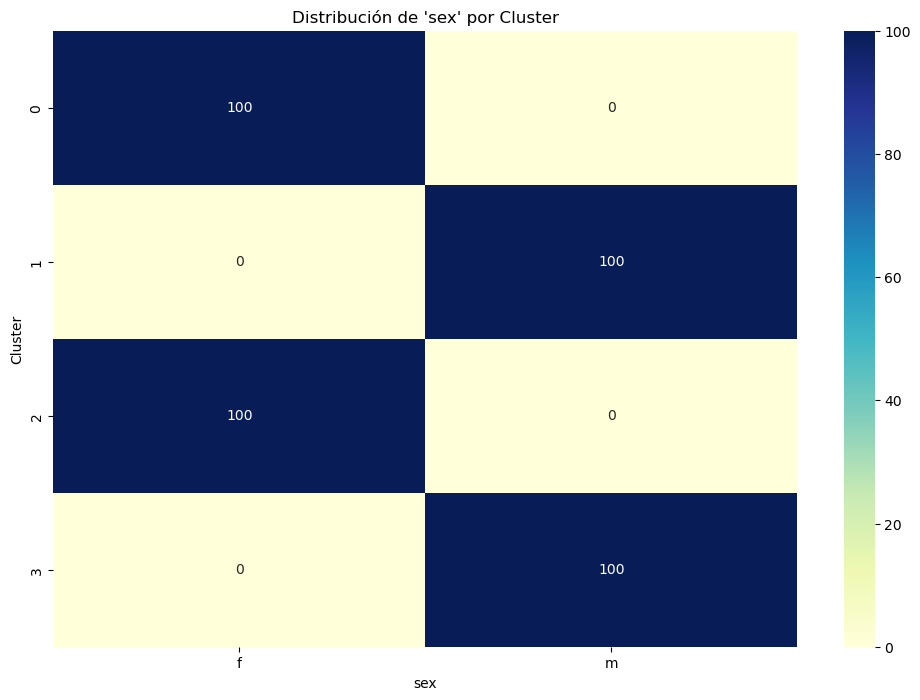

In [69]:
category_percentages(data, 'sex')

#### age_category
El clúster 0 y 1 tienen componentes del mismo grupo de edad. El resto de clústers son más heterogéneos aunque en la mayoría predominan personas del grupo de edad entre 25 y 34 años

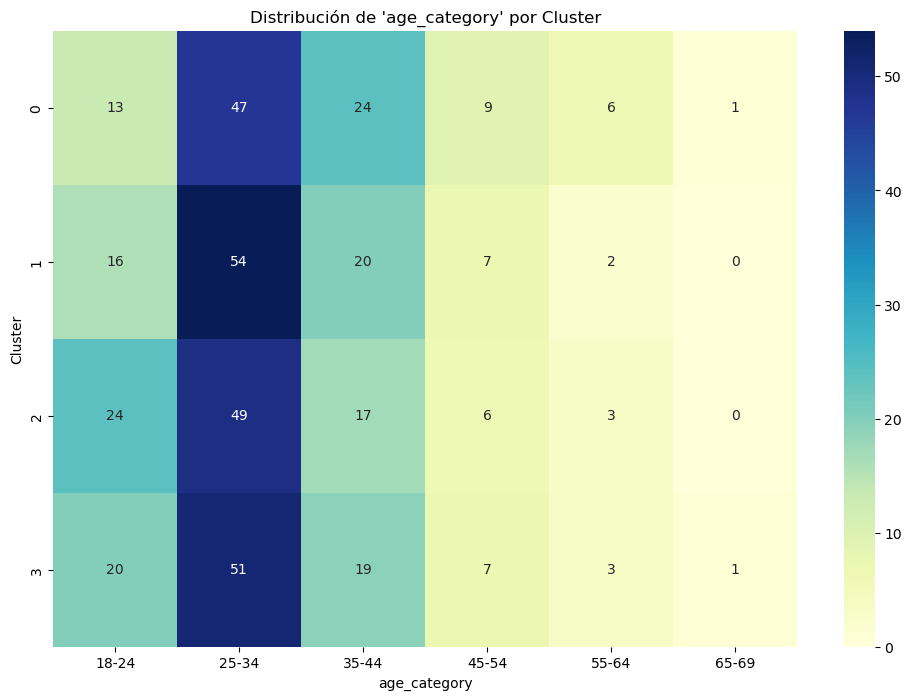

In [70]:
category_percentages(data, 'age_category')

### orientation

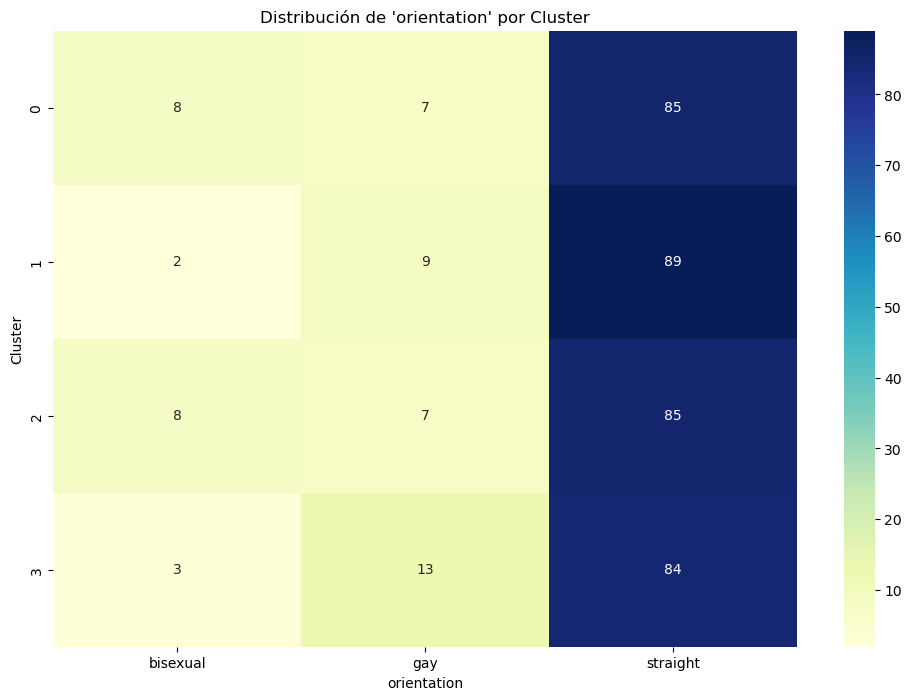

In [71]:
category_percentages(data, 'orientation')

### body_type
El clúster 3 está compuesto exclusivamente por personas del tipo "Average"; el tipo 1 y 7 están formados mayoritariamente por personas de tipo "fit". Otros clústeres son mucho más diversos. 

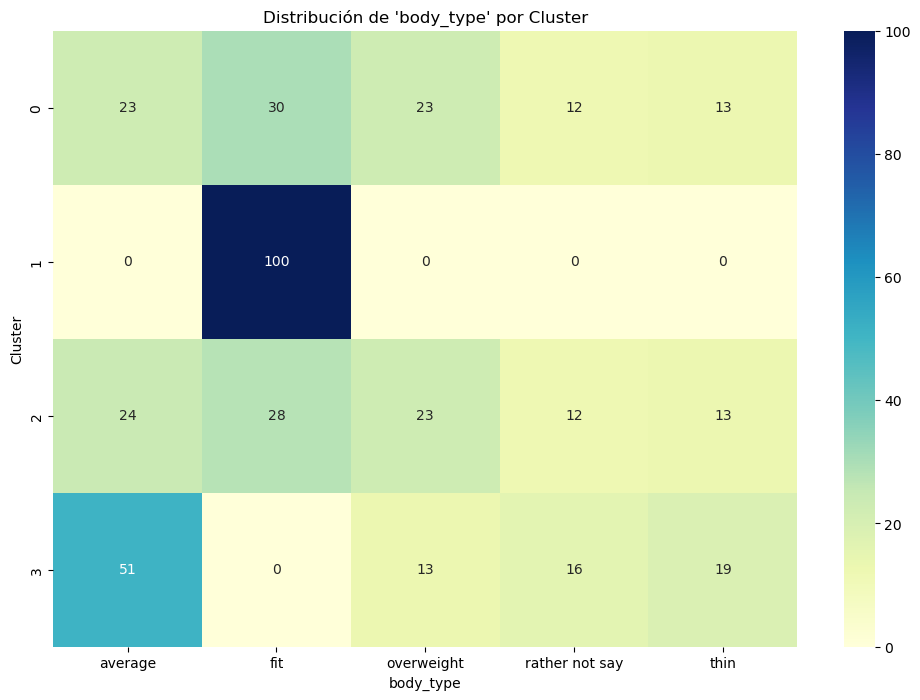

In [72]:
category_percentages(data, 'body_type')

### ethnicity
Todos los clústeres están principalmente formados por personas de raza blanca.  Aunque en todos los clústeres hay representantes de todas las razas excepto en el 4.

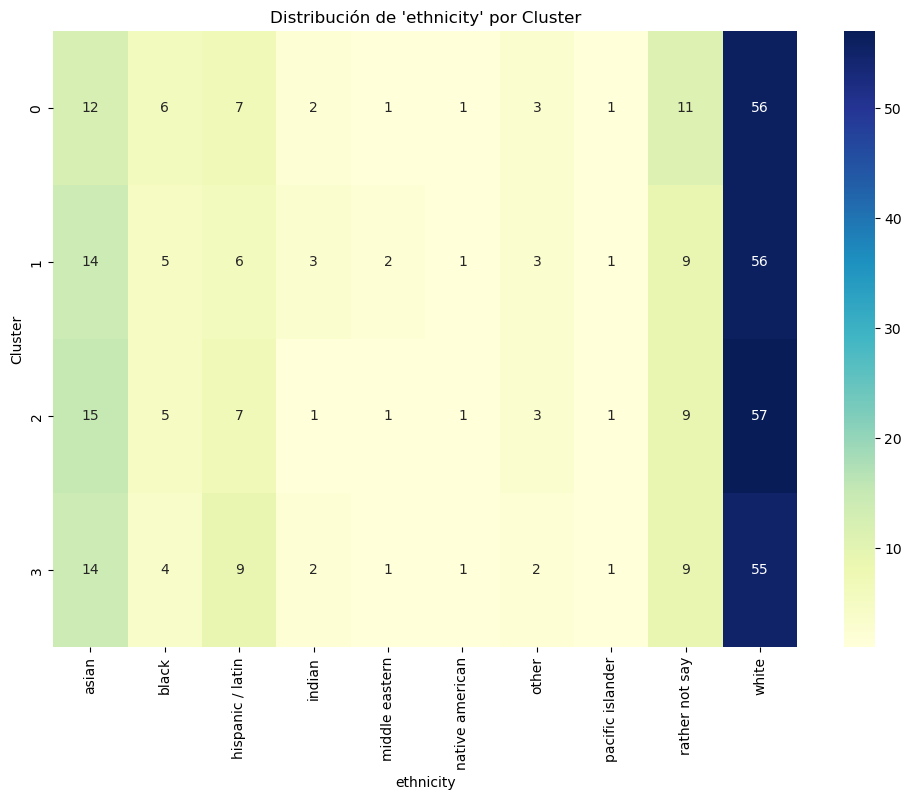

In [73]:
category_percentages(data,'ethnicity')

### drinks
En todos los clústers predominan las personas que beben ocasionalmente, aunque miembros de todas las categorías están presentes en todos los grupos.

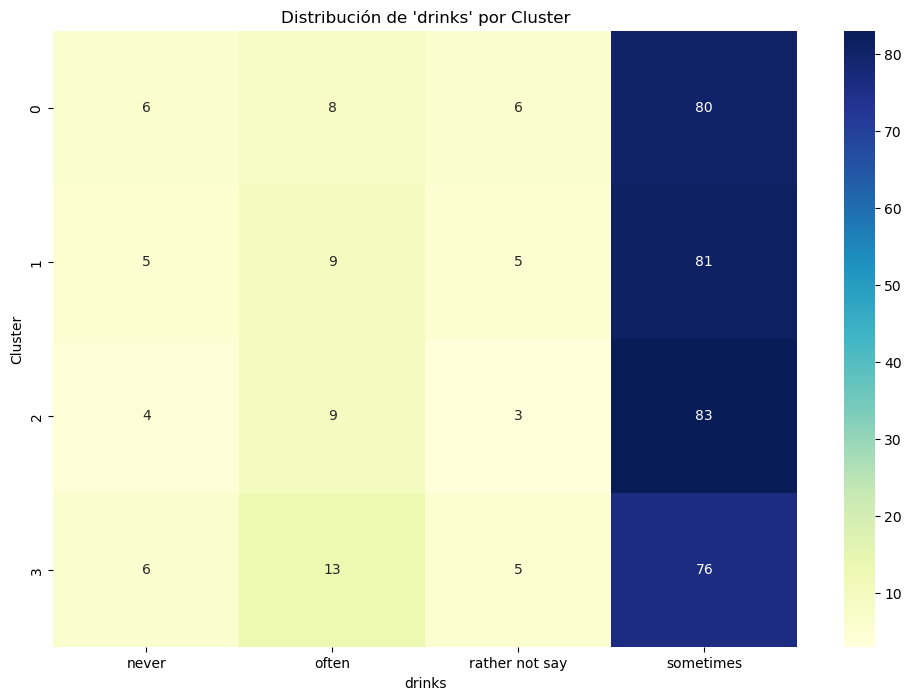

In [74]:
category_percentages(data,'drinks')

### education
El clúster 4 está formado únicamente por graduados en la escuela secundaria, mientras que el resto de grupos son más heterogéneos con predominancia en graduados universitarios

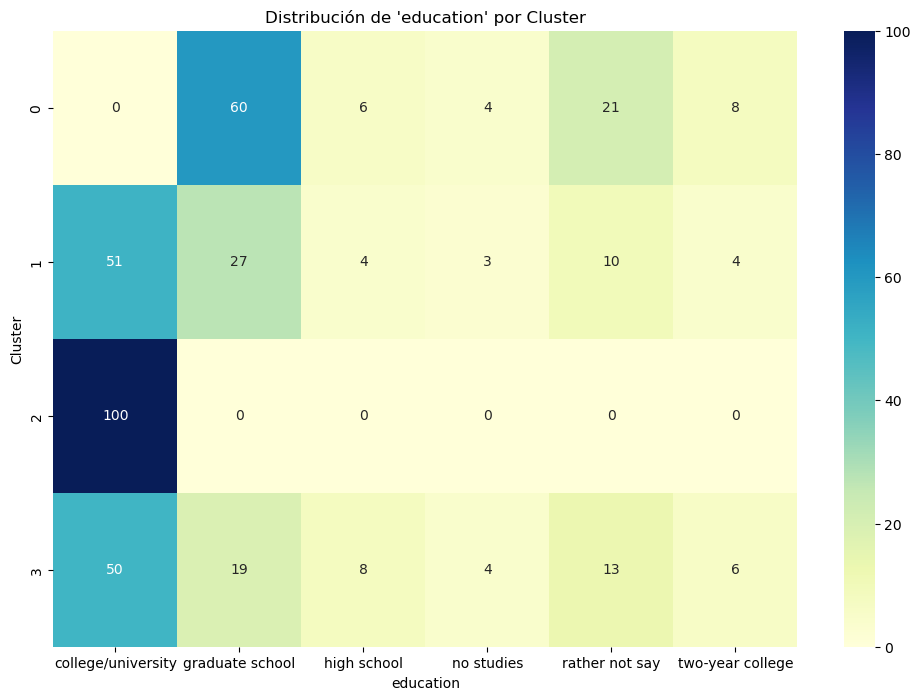

In [75]:
category_percentages(data, 'education')

### job
Todos los clústers son heterogéneos con predominancia en distintas categorías laborales, principalmente tech.

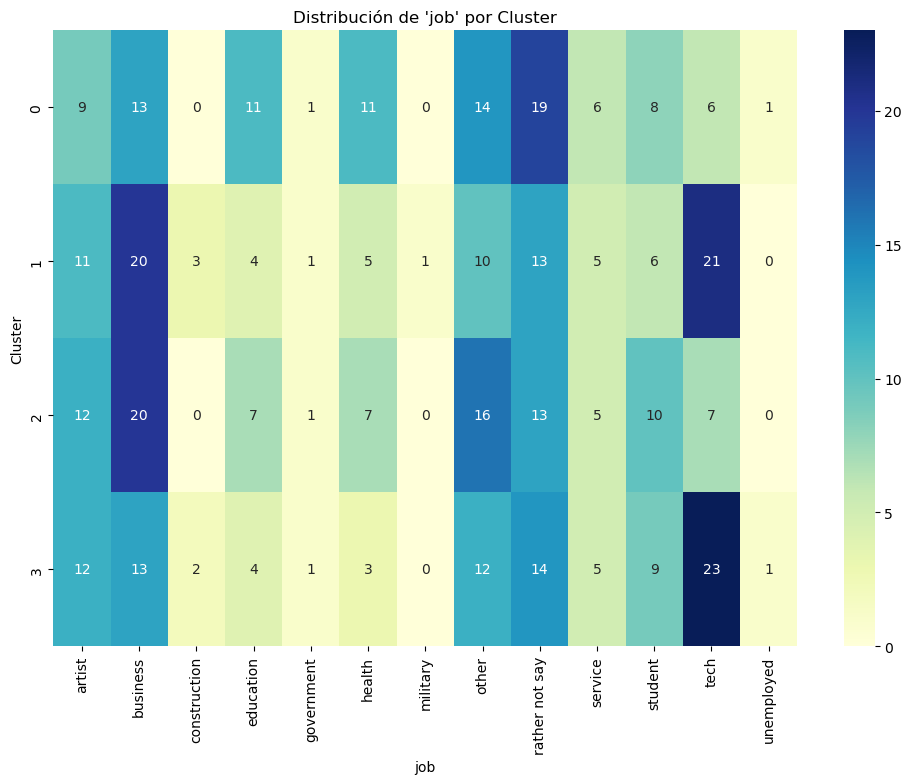

In [76]:
category_percentages(data,'job')

# Análisis de sentimientos

El análisis de sentimientos es una técnica que se engloba en el campo de la inteligencia artificial y el procesamiento del lenguaje natural que se utiliza para evaluar la polaridad emocional detrás de un conjunto de datos de texto. Su objetivo principal es determinar si el contenido textual, en este caso los campos de ensayo, expresan emociones positivas, negativas o neutras.
El proceso general de análisis de sentimientos implica estos pasos:
* Tokenización: que consiste en dividir el texto en unidades más pequeñas llamadas tokens que serían frases o palabras.
* Limpieza de texto: Se realiza una limpieza de texto para eliminar caracteres especiales, signos de puntuación, números y cualquier otro contenido que no sea relevante para el análisis.
* Conversión a minúsculas: para asegurarse de que las palabras escritas en mayúsculas y minúsculas se traten de la misma manera, se convierte todo el texto a minúsculas.
* Stopwords: Las "stop words" son palabras comunes como determinantes, artículos, etc. que no aportan información significativa al análisis. Es posible eliminar estas palabras y así reducir el ruido en los datos.
* Análisis de sentimientos: Finalmente se realiza el análisis de sentimientos sobre el texto de las columnas de ensayo para extraer la polaridad de cada respuesta.
* Análisis de keywords: Se realizará también un análisis de las palabras más frecuentes para cada clúster en función de si la polaridad es negativa, positiva o neutra.

## Carga de librerías

Cargamos las siguientes librerías para hacer el análisis de sentimientos
* nltk: Natural Language Toolkit es una biblioteca de procesamiento de lenguaje natural que proporciona herramientas para trabajar con texto y realizar tareas de tokenización entre otras.
* nltk.tokenize: Se utiliza para dividir el texto en palabras individuales o tokens
* nltk.corpus: contiene conjuntos de palabras que se utilizan para entrenar modelos de procesamiento de lenguaje natural.
* Stopwords: es uno de los corpus disponibles y contiene una lista de palabras comunes que generalmente se eliminan del texto al realizar tareas de procesamiento de lenguaje natural ya que no aportan información significativa.
* string: proporciona constantes y funciones relacionadas con caracteres y cadenas de texto, por ejemplo string.punctuation contiene todos los caracteres de puntuación y se puede utilizar para eliminar la puntuación de un texto.
* punkt: permite dividir un texto en oraciones individuales.
* TextBlob: nos permite calcular una puntuación de análisis de sentimientos que nos dirá si el texto tiene una polaridad positiva, negativa o neutra.
* ngrams: nos permite calcular ngramas dentro de un texto.
* Wordcloud: genera nubes de palabras en función de su frecuencia de aparición en un texto

In [77]:
# Carga de librerías
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.util import ngrams
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabriel.romero\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabriel.romero\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Procesamiento

En este paso generamos un conjunto de stopwords y tokenizacions y limpiamos el texto de signos de puntuación y stopwords.

In [78]:
# Creamos un conjunto de stopwords en inglés
stop_words = set(stopwords.words('english'))

# Creamos una función para tokenizar y limpiar el texto
def tokenize_and_clean(text):
    """
    Tokeniza y limpia el texto dado.

    Parámetros:
    - text (str): El texto que se desea tokenizar y limpiar.

    Retorna:
    - list: Una lista de tokens limpios.
    """
    # Verificamos si el texto es nulo y si lo es devolvemos una lista vacía
    if pd.isna(text):
        return []
    # Convertimos el texto a minúsculas
    text = text.lower()
    # Tokenizamos el texto a palabras
    tokens = word_tokenize(text)
    # Eliminamos los signos de puntuación y las stopwords
    cleaned_tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    # Devolvemos una lista de tokens limpios
    return cleaned_tokens

# Seleccionamos las columnas de essay dónde vamos a aplicar la función
essay_columns = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']

# Aplicamos la función a las columnas de essay y creamos las nuevas columnas con los tokens
for col in essay_columns:
    data[f"{col}_tokens"] = data[col].apply(tokenize_and_clean)

In [79]:
data['essay0_tokens'].head(n=1)

0    [would, love, think, kind, intellectual, either, dumbest, smart, guy, smartest, dumb, guy, ca, n't, say, tell, difference, love, talk, ideas, concepts, forge, odd, metaphors, instead, reciting, cliches, like, simularities, friend, mine, 's, house, underwater, salt, mine, favorite, word, salt, way, weird, choice, know, things, life, better, metaphors, seek, make, little, better, everyday, productively, lazy, way, got, tired, tying, shoes, considered, hiring, five, year, old, would, probably, tie, shoes, ..., decided, wear, leather, shoes, dress, shoes, love, really, serious, really, deep, conversations, really, silly, stuff, willing, snap, light, hearted, rant, kiss, n't, funny, able, make, laugh, able, bend, spoons, mind, telepathically, ...]
Name: essay0_tokens, dtype: object

## Keywords
A continuación analizamos cuáles son las palabras más frecuentes por cada columna de ensayo. 

In [80]:
# Definimos las columnas a analizar
columns = ['essay0_tokens', 'essay1_tokens', 'essay2_tokens', 'essay3_tokens',
           'essay4_tokens', 'essay5_tokens', 'essay6_tokens', 'essay7_tokens',
           'essay8_tokens', 'essay9_tokens']

# Creamos una función para contar palabras
def calculate_word_frequencies(data, column):
    """
    Calcula las frecuencias de palabras en una columna tokenizada.

    Parámetros:
    - data (DataFrame): El datagrame que contiene los datos.
    - column (str): El nombre de la columna tokenizada a analizar.

    Retorna:
    - list: Una lista de tuplas que contienen las palabras más comunes junto con su frecuencia.
    """
     # Combinamos todas las listas de tokens en una única lista
    all_words = [word for words_list in data[column].dropna() for word in words_list]

    # Volvemos a eliminar stopwords y eliminamos signos de puntuación
    words = [word for word in all_words if word.isalnum() and word not in stop_words and word not in string.punctuation]

    # Calculamos las frecuencias de cada palabra
    word_counts = {}
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    # Ordenamos según la frecuencia de aparición
    common_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10]

    # Creamos una lista con el formato "palabra, frecuencia"
    common_words_str = [f"{word}, {count}" for word, count in common_words]

    return common_words_str

# Creamos un diccionario para almacenar los resultados
results = {}

# Aplicamos la función a cada columna
for col in columns:
    common_words = calculate_word_frequencies(data, col)
    results[col] = common_words

# Creamos un dataframe para visualizar los resultados
result_df = pd.DataFrame.from_dict(results)
result_df

essay0_tokens   essay1_tokens    essay2_tokens essay3_tokens  \
0     love, 47215     work, 17415      good, 19111  smile, 11094   
1     like, 43996  working, 16173    people, 15013    eyes, 9768   
2     life, 28214     time, 14437    making, 14708  people, 8664   
3   people, 26484     life, 13176    things, 11919    hair, 5857   
4      new, 22453     love, 10510     really, 7423    like, 4537   
5     time, 22086      like, 9528    cooking, 6840  notice, 4262   
6     good, 21225    trying, 9329  listening, 6341    know, 3556   
7   things, 20951       new, 8357       like, 5986  really, 3236   
8  friends, 17934    school, 8187       also, 5471   first, 2966   
9    enjoy, 17164      also, 8054      laugh, 4729    look, 2932   

     essay4_tokens   essay5_tokens   essay6_tokens   essay7_tokens  \
0     music, 43138  friends, 21466      life, 9516  friends, 22171   
1      food, 38637   family, 17689      next, 9052      home, 9826   
2      love, 36333    music, 13864    things, 6584     movie, 7447   
3    movies, 35489     good, 10728    people, 6268    dinner, 7306   
4      like, 34332     food, 10126      time, 5955     night, 6923   
5     books, 31088      love, 7098     think, 5653  watching, 6898   
6  anything, 21365     water, 5688    future, 5505    friday, 6327   
7  favorite, 19546    coffee, 5276      like, 5252     going, 6112   
8      good, 14474    things, 4448     world, 4878   hanging, 5411   
9     shows, 13298   without, 4392  thinking, 4649      good, 4678   

   essay8_tokens  essay9_tokens  
0     like, 5550    like, 19663  
1     know, 3930    want, 17565  
2  private, 3818     know, 8909  
3   really, 3554     good, 7688  
4     love, 2928  looking, 7180  
5      one, 2754    think, 6952  
6      get, 2706  someone, 6451  
7    would, 2570      get, 6078  
8   people, 2477      fun, 5950  
9      ask, 2410     life, 5629

Este análisis nos proporciona las palabras más utilizadas en cada columna. Sin embargo, estas palabras por si solas no capturan completamente el significado de una oración o frase. Para proporcionar un contexto más amplio vamos a calcular ngramas compuestos por 4 palabras.

In [81]:
# Función para limpiar y contar n-gramas
def calculate_ngram_frequencies(data, column):
    '''
    Calcula y devuelve los 4-gramas más comunes junto con sus frecuencias en una columna de un DataFrame de texto.

    Parámetros:
        - data: DataFrame que contiene los datos de texto.
        - column: Nombre de la columna a analizar.

    Devuelve:
        - Lista de los 4-gramas más comunes y sus frecuencias.
    '''
    # Combinamos todas las listas de tokens en una sola lista
    all_tokens = [token for tokens_list in data[column].dropna() for token in tokens_list]

    # Eliminamos stopwords y filtrar solo palabras alfanuméricas
    tokens = [token for token in all_tokens if token.isalnum() and token not in stop_words]

    # Generamos 4-gramas y contamos sus frecuencias
    ngrams_list = list(ngrams(tokens, 4))

    # Calculamos las frecuencias de los 4-gramas
    ngram_counts = {}
    for ngram in ngrams_list:
        ngram_str = " ".join(ngram)
        if ngram_str in ngram_counts:
            ngram_counts[ngram_str] += 1
        else:
            ngram_counts[ngram_str] = 1

    # Obtenemos los 4-gramas más comunes y los formateamos
    common_ngrams = sorted(ngram_counts.items(), key=lambda x: x[1], reverse=True)[:10]
    common_ngrams = [f'{ngram}, {freq}' for ngram, freq in common_ngrams]

    return common_ngrams

# Creamos un diccionario para almacenar los resultados
results = {}

# Aplicamos la función a todas las columnas para calcular 4-gramas
for col in columns:
    ngram_key = f"{col}_4grams"
    common_ngrams = calculate_ngram_frequencies(data, col)
    results[ngram_key] = common_ngrams

# Creamos un dataframe para ver los resultados
result_df = pd.DataFrame.from_dict(results)
result_df = result_df.T
result_df.columns = [f"Top {i+1}" for i in range(10)]
result_df

Top 1  \
essay0_tokens_4grams          looking meet new people, 309   
essay1_tokens_4grams          make world better place, 162   
essay2_tokens_4grams   making people feel comfortable, 369   
essay3_tokens_4grams        first thing people notice, 282   
essay4_tokens_4grams  eternal sunshine spotless mind, 1464   
essay5_tokens_4grams       things could never without, 185   
essay6_tokens_4grams         spend lot time thinking, 1006   
essay7_tokens_4grams       thing typical friday night, 156   
essay8_tokens_4grams      private thing willing admit, 130   
essay9_tokens_4grams          words words words words, 351   

                                                 Top 2  \
essay0_tokens_4grams          work hard play hard, 275   
essay1_tokens_4grams          work hard play hard, 154   
essay2_tokens_4grams     good making people laugh, 229   
essay3_tokens_4grams  thing people usually notice, 107   
essay4_tokens_4grams        red hot chili peppers, 613   
essay5_tokens_4grams           1 family 2 friends, 126   
essay6_tokens_4grams              meu meu meu meu, 497   
essay7_tokens_4grams   really typical friday night, 91   
essay8_tokens_4grams          blah blah blah blah, 109   
essay9_tokens_4grams          would like get know, 209   

                                                 Top 3  \
essay0_tokens_4grams      love meeting new people, 275   
essay1_tokens_4grams  spending time family friends, 96   
essay2_tokens_4grams      five hundred words five, 175   
essay3_tokens_4grams    first thing people usually, 99   
essay4_tokens_4grams      fear loathing las vegas, 499   
essay5_tokens_4grams           family 2 friends 3, 119   
essay6_tokens_4grams      make world better place, 255   
essay7_tokens_4grams     happy hour dinner friends, 72   
essay8_tokens_4grams         pretty much open book, 93   
essay9_tokens_4grams         want get know better, 185   

                                                      Top 4  \
essay0_tokens_4grams              born raised bay area, 229   
essay1_tokens_4grams       spending time friends family, 90   
essay2_tokens_4grams        hundred words five hundred, 175   
essay3_tokens_4grams         first things people notice, 59   
essay4_tokens_4grams         daily show colbert report, 494   
essay5_tokens_4grams          family friends good food, 117   
essay6_tokens_4grams               also spend lot time, 187   
essay7_tokens_4grams       typical friday night usually, 67   
essay8_tokens_4grams  putting anything complete profile, 31   
essay9_tokens_4grams             think would get along, 126   

                                                      Top 5  \
essay0_tokens_4grams         born raised san francisco, 221   
essay1_tokens_4grams     san francisco state university, 67   
essay2_tokens_4grams          words five hundred words, 175   
essay3_tokens_4grams        people usually notice smile, 54   
essay4_tokens_4grams        one hundred years solitude, 283   
essay5_tokens_4grams            six things could never, 106   
essay6_tokens_4grams           spend much time thinking, 83   
essay7_tokens_4grams     hanging friends watching movie, 63   
essay8_tokens_4grams  anything complete profile putting, 30   
essay9_tokens_4grams              like get know better, 108   

                                                      Top 6  \
essay0_tokens_4grams          enjoy meeting new people, 175   
essay1_tokens_4grams                moved back bay area, 66   
essay2_tokens_4grams        making people laugh making, 172   
essay3_tokens_4grams        first things people usually, 48   
essay4_tokens_4grams              one flew cuckoo nest, 271   
essay5_tokens_4grams             air water food shelter, 73   
essay6_tokens_4grams           lot time thinking future, 62   
essay7_tokens_4grams         typical friday night could, 60   
essay8_tokens_4grams  complete profile putting anything, 30   
essay9_tokens_4grams               one thous words one, 107   

          

## Nubes de palabras
A continuación vamos a representar mediante nubes de palabras las palabras más frecuentes en función de la polaridad positiva, negativa o neutra de cada columna.

In [82]:
# Función para generar nubes de palabras por polaridad para una columna dada

def generate_wordcloud_for_column(data, column_tokens):
    """
    Genera una nube de palabras para una columna de tokens dada.

    Args:
        data (pd.DataFrame): El dataframe que contiene los datos.
        column_tokens (str): El nombre de la columna que contiene los tokens.

    Returns:
        None: La función muestra la nube de palabras en la salida.
    """
    # Obtenemos el nombre de la columna para usarlo en el título de la nube de palabras
    column_name = column_tokens.replace('_tokens', '')

    # Concatenamos todos los tokens en una sola cadena de texto
    all_tokens = ' '.join([' '.join(tokens) for tokens in data[column_tokens]])

    # Generamos la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens)

    # Ploteamos la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Nube de palabras para {column_name}', fontsize=14)
    plt.axis('off')
    plt.show()




### Essay0 - My self summary

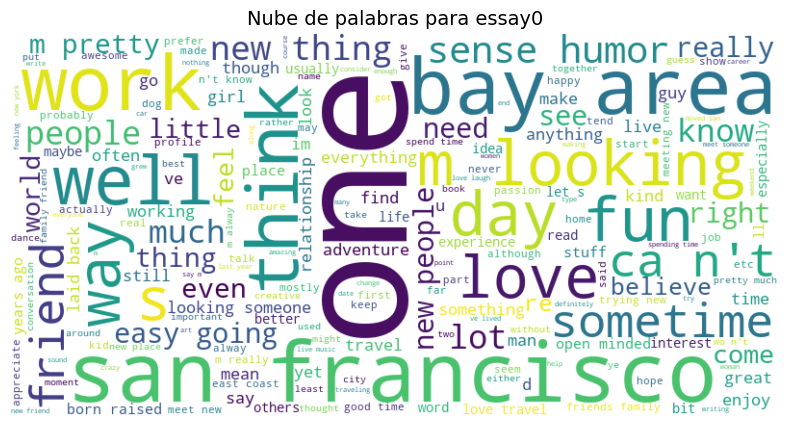

In [83]:
generate_wordcloud_for_column(data, 'essay0_tokens')

### Essay1 - What I'm doing with my life

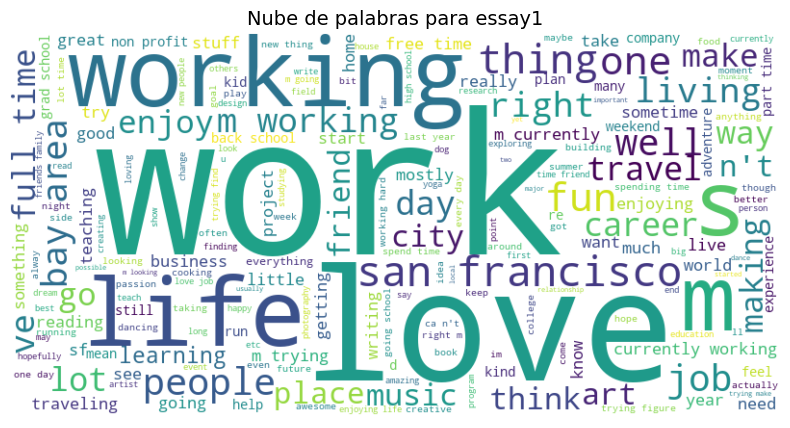

In [84]:
generate_wordcloud_for_column(data, 'essay1_tokens')

### Essay2 - I'm really good at

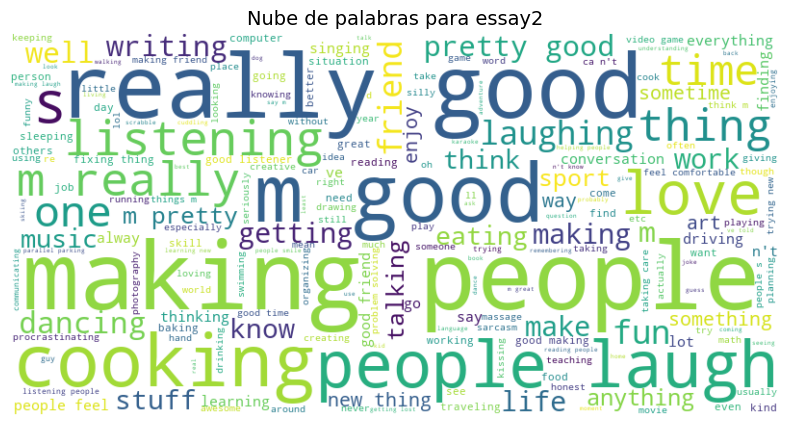

In [85]:
generate_wordcloud_for_column(data, 'essay2_tokens')

### Essay3 - The first thing people usually notice about me

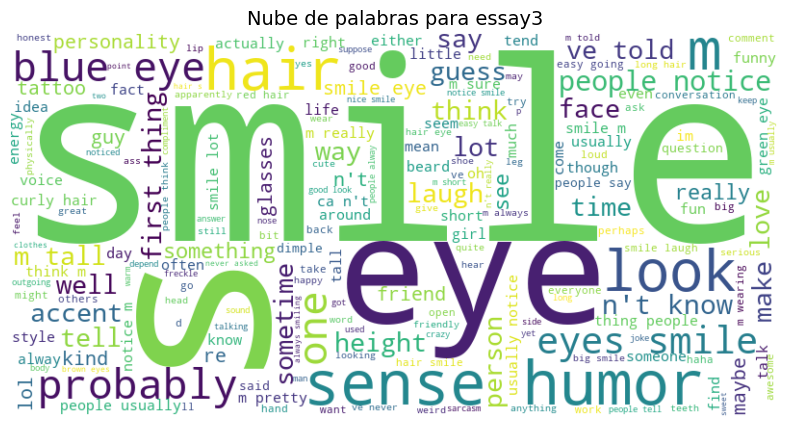

In [86]:
generate_wordcloud_for_column(data, 'essay3_tokens')

### Essay4 - Favorite books, movies, show, music and food

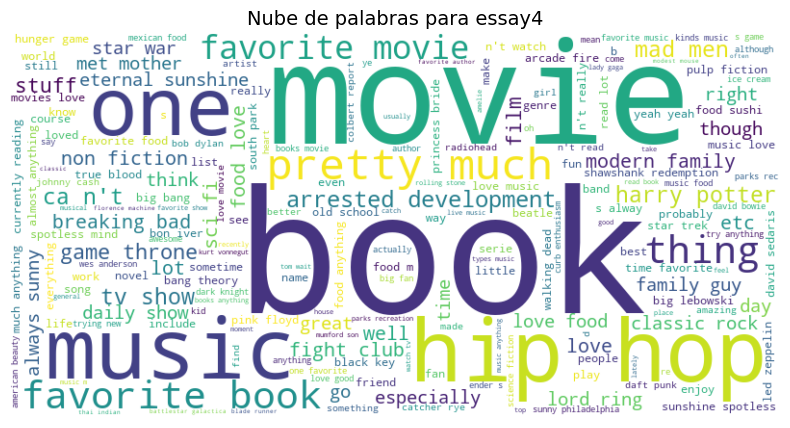

In [87]:
generate_wordcloud_for_column(data, 'essay4_tokens')

### Essay5 - The six things I could never do without

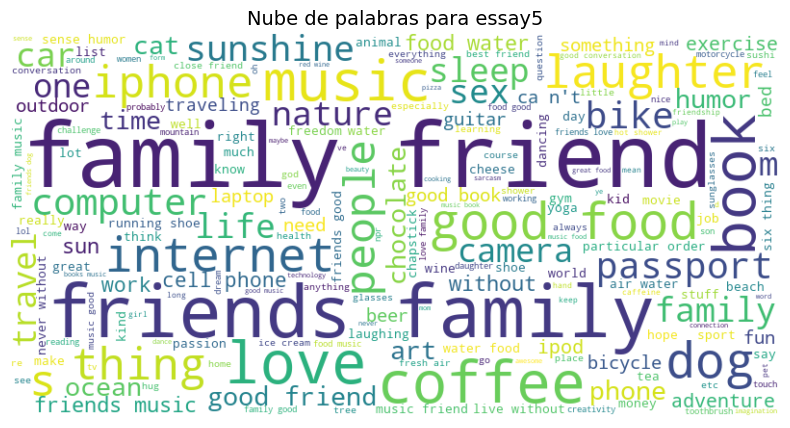

In [88]:
generate_wordcloud_for_column(data, 'essay5_tokens')

### Essay6 - I spend a lot of time thinking about

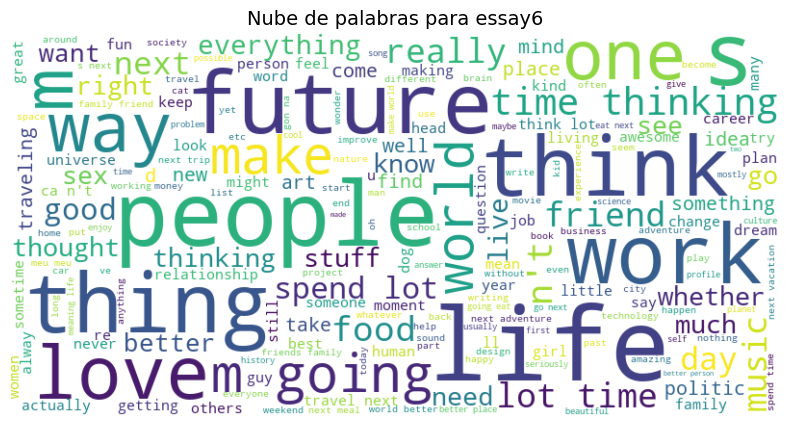

In [89]:
generate_wordcloud_for_column(data, 'essay6_tokens')

### Essay7 - On a typical Friday night I am

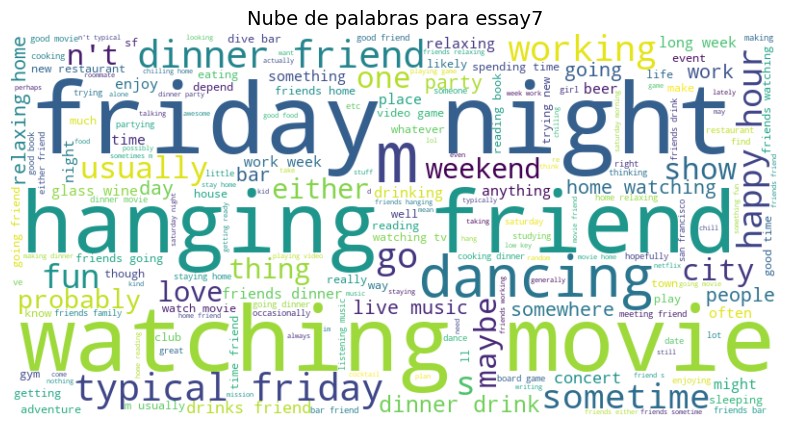

In [90]:
generate_wordcloud_for_column(data, 'essay7_tokens')

### Essay8 - The most private thing I am willing to admit

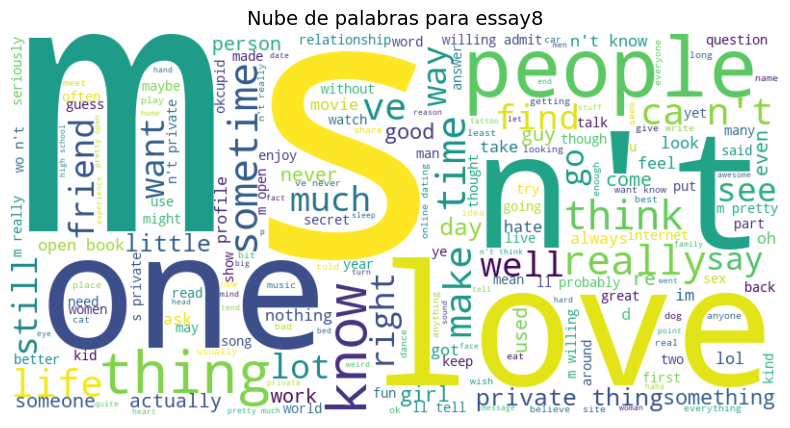

In [91]:
generate_wordcloud_for_column(data, 'essay8_tokens')

### Essay9 - You should message me if ...

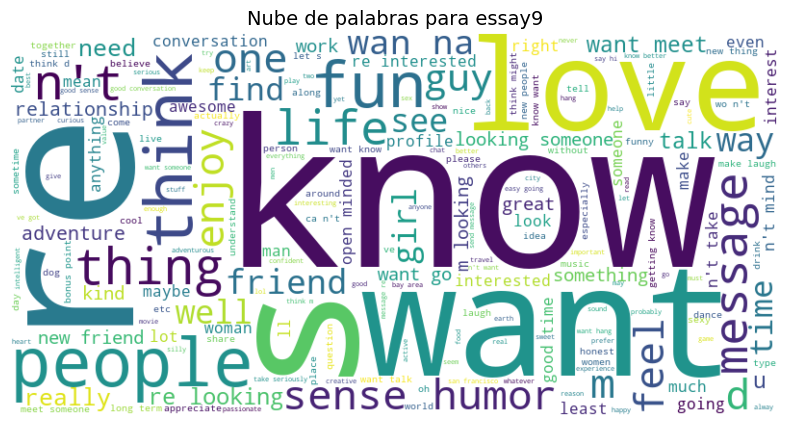

In [92]:
generate_wordcloud_for_column(data, 'essay9_tokens')

In [96]:
from nltk import ngrams
from collections import Counter

def calculate_ngram_frequencies(tokens_list):
    '''
    Calcula y devuelve los 4-gramas más comunes junto con sus frecuencias de una lista de tokens.

    Parámetros:
        - tokens_list: Lista de listas de tokens.

    Devuelve:
        - Lista de los 4-gramas más comunes y sus frecuencias.
    '''
    # Combinamos todas las listas de tokens en una sola lista
    all_tokens = [token for sublist in tokens_list for token in sublist]

    # Generamos 4-gramas y contamos sus frecuencias
    ngrams_list = list(ngrams(all_tokens, 4))

    # Calculamos las frecuencias de los 4-gramas
    return Counter(ngrams_list).most_common(10)

def process_clusters(data, columns, cluster_column):
    results = []

    for cluster in data[cluster_column].unique():
        cluster_data = data[data[cluster_column] == cluster]

        for col in columns:
            # Asegurándonos de que la columna contiene listas de tokens
            tokens_list = cluster_data[col].dropna().tolist()
            common_ngrams = calculate_ngram_frequencies(tokens_list)
            for rank, (ngram, freq) in enumerate(common_ngrams, start=1):
                ngram_str = " ".join(ngram)
                results.append([cluster, rank, col, ngram_str, freq])
    
    return results

# Asumimos que las columnas de tokens están definidas
token_columns = ['essay0_tokens', 'essay1_tokens', 'essay2_tokens', 'essay3_tokens', 
                 'essay4_tokens', 'essay5_tokens', 'essay6_tokens', 'essay7_tokens', 
                 'essay8_tokens', 'essay9_tokens']
cluster_column = 'cluster'

# Calculamos los 4-gramas
results = process_clusters(data, token_columns, cluster_column)

# Creamos un DataFrame para los resultados y lo guardamos como CSV
result_df = pd.DataFrame(results, columns=["Cluster", "Top", "Columna", "4grama", "Frecuencia"])
result_df.to_csv(r'C:/Users/gabriel.romero/OneDrive - TUI/Desktop/uoc/TFM/ngram_frequencies_by_cluster.csv', index=False)


# Extracción de caracteristicas con BERT


Después de realizar la clusterización de usuarios utilizando las variables categóricas disponibles, hemos identificado el potencial de las columnas "essay" para describir con mayor detalle la personalidad de los usuarios. Nuestro próximo paso implica aprovechar estas columnas para generar nuevos clusters utilizando la potencia de BERT (Bidirectional Encoder Representations from Transformers), en su versión distilBERT, para extraer características de cada columna "essay". Este modelo de lenguaje preentrenado nos permite obtener representaciones vectoriales que contienen información semántica y contextual del texto en forma de vectores de números reales. Estas características textuales pueden ser utilizadas en diversas aplicaciones de procesamiento de lenguaje natural, como clasificación, agrupación y generación de perfiles.

Al utilizar distilBERT, podemos obtener representaciones de alto nivel de cada una de las columnas de "essay" y, al mismo tiempo, comprender aspectos como el tono, el estilo y el contenido general de cada columna. Sin embargo, es importante destacar que el procesamiento de estas columnas utilizando este modelo de lenguaje puede ser intensivo en recursos computacionales. Por esta razón, primero evaluaremos si es posible aplicar este enfoque a las columnas de "tokens", ya que existe un límite de 512 tokens por columna para su utilización efectiva.

In [347]:
# Contamos el número de filas que exceden el límite de 512 tokens por columna
num_rows_exceeding = sum(data.apply(lambda row: any(len(row[col]) > 512 for col in essay_columns), axis=1))

print(f"Hay {num_rows_exceeding} filas con más de 512 tokens en alguna de las columnas essay")

# Listamos las columnas y contamos el número de filas que exceden el límite en cada una
for col in essay_columns:
    num_exceeds_in_col = sum(data[col].apply(lambda x: len(x) > 512))
    if num_exceeds_in_col > 0:
        print(f"La columna {col} tiene {num_exceeds_in_col} filas con más de 512 tokens.")


Hay 149 filas con más de 512 tokens en alguna de las columnas essay
La columna essay0 tiene 76 filas con más de 512 tokens.
La columna essay1 tiene 6 filas con más de 512 tokens.
La columna essay2 tiene 3 filas con más de 512 tokens.
La columna essay4 tiene 59 filas con más de 512 tokens.
La columna essay6 tiene 5 filas con más de 512 tokens.
La columna essay8 tiene 4 filas con más de 512 tokens.
La columna essay9 tiene 8 filas con más de 512 tokens.


In [352]:
# Guardamos los resultados del análisis de sentimientos
data.to_csv(r'C:\Users\gabriel.romero\OneDrive - TUI\Desktop\uoc\TFM\ok_cupid.csv', index=False)